
# Advanced Data Visualization with ggplot2




In [1]:
library(ggplot2)
theme_set(theme_bw(base_size=16) + theme(strip.background = element_blank()))

This notebook covers fundamental concepts for creating effective data visualization and introduces tools and techniques for visualizing large, high-dimensional data using R. We will review fundamental concepts for visually displaying quantitative information, such as using series of small multiples, avoiding "chart-junk," and maximizing the data-ink ratio. We will cover the grammar of graphics (geoms, aesthetics, stats, and faceting), and using the ggplot2 package to create plots layer-by-layer.

This lesson assumes a basic familiarity with R, data frames, and manipulating data with dplyr and %>%.

## Review

### Gapminder data

We're going to work with a different dataset for this section. It's a cleaned-up excerpt from the Gapminder data. Download the gapminder.csv data by clicking here or using the link above.

Let's read in the data to an object called gm and take a look with View. Remember, we need to load both the dplyr and readr packages for efficiently reading in and displaying this data.

In [66]:

# Load packages
library(readr)
library(dplyr)

In [5]:
# Read the data
gm <- read_csv(file="data/gapminder.csv")

# Show the first few lines of the data
gm

Parsed with column specification:
cols(
  country = col_character(),
  continent = col_character(),
  year = col_double(),
  lifeExp = col_double(),
  pop = col_double(),
  gdpPercap = col_double()
)



country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


# Optionally bring up data in a viewer window.
# View(gm)


-   `country` a categorical variable 142 levels
-   `continent`, a categorical variable with 5 levels
-   `year`: going from 1952 to 2007 in increments of 5 years
-   `pop`: population
-   `gdpPercap`: GDP per capita
-   `lifeExp`: life expectancy


## dplyr review

The dplyr package gives you a handful of useful **verbs** for managing data. On their own they don't do anything that base R can't do. Here are some of the *single-table* verbs we'll be working with in this lesson (single-table meaning that they only work on a single table -- contrast that to *two-table* verbs used for joining data together). They all take a `data.frame` or `tbl_df` as their input for the first argument, and they all return a `data.frame` or `tbl_df` as output.

1.  `filter()`: filters *rows* of the data where some condition is true
2.  `select()`: selects out particular *columns* of interest
3.  `mutate()`: adds new columns or changes values of existing columns
4.  `arrange()`: arranges a data frame by the value of a column
5.  `summarize()`: summarizes multiple values to a single value, most useful when combined with...
6.  `group_by()`: groups a data frame by one or more variable. Most data operations are useful done on groups defined by variables in the the dataset. The `group_by` function takes an existing data frame and converts it into a grouped data frame where `summarize()` operations are performed *by group*.

Additionally, the **`%>%`** operator allows you to "chain" operations together. Rather than nesting functions inside out, the `%>%` operator allows you to write operations left-to-right, top-to-bottom. Let's say we wanted to get the average life expectancy and GDP (not GDP per capita) for Asian countries for each year.

![](img/nest_vs_pipe_gm.png)

The %>% would allow us to do this:

In [7]:

gm %>%
  mutate(gdp=gdpPercap*pop) %>%
  filter(continent=="Asia") %>%
  group_by(year) %>%
  summarize(mean(lifeExp), 
mean(gdp))

`summarise()` ungrouping output (override with `.groups` argument)



year,mean(lifeExp),mean(gdp)
<dbl>,<dbl>,<dbl>
1952,46.31439,34095762661
1957,49.31854,47267432088
1962,51.56322,60136869012
1967,54.66364,84648519224
1972,57.31927,124385747313
1977,59.61056,159802590186
1982,62.61794,194429049919
1987,64.85118,241784763369
1992,66.53721,307100497486


Instead of this:

In [8]:
summarize(
  group_by(
    filter(
      mutate(gm, gdp=gdpPercap*pop), 
    continent=="Asia"), 
  year), 
mean(lifeExp), mean(gdp))

`summarise()` ungrouping output (override with `.groups` argument)



year,mean(lifeExp),mean(gdp)
<dbl>,<dbl>,<dbl>
1952,46.31439,34095762661
1957,49.31854,47267432088
1962,51.56322,60136869012
1967,54.66364,84648519224
1972,57.31927,124385747313
1977,59.61056,159802590186
1982,62.61794,194429049919
1987,64.85118,241784763369
1992,66.53721,307100497486


## About ggplot2


**ggplot2** is a widely used R package that extends R's visualization capabilities. It takes the hassle out of things like creating legends, mapping other variables to scales like color, or faceting plots into small multiples. We'll learn about what all these things mean shortly.

*Where does the "gg" in ggplot2 come from?* The **ggplot2** package provides an R implementation of Leland Wilkinson's *Grammar of Graphics* (1999). The *Grammar of Graphics* allows you to think beyond the garden variety plot types (e.g. scatterplot, barplot) and the consider the components that make up a plot or graphic, such as how data are represented on the plot (as lines, points, etc.), how variables are mapped to coordinates or plotting shape or color, what transformation or statistical summary is required, and so on.

Specifically, **ggplot2** allows you to build a plot layer-by-layer by specifying:

-   a **geom**, which specifies how the data are represented on the plot (points, lines, bars, etc.),
-   **aesthetics** that map variables in the data to axes on the plot or to plotting size, shape, color, etc.,
-   a **stat**, a statistical transformation or summary of the data applied prior to plotting,
-   **facets**, which we've already seen above, that allow the data to be divided into chunks on the basis of other categorical or continuous variables and the same plot drawn for each chunk.

*First, a note about `qplot()`.* The `qplot()` function is a quick and dirty way of making ggplot2 plots. You might see it if you look for help with ggplot2, and it's even covered extensively in the ggplot2 book. And if you're used to making plots with built-in base graphics, the `qplot()` function will probably feel more familiar. But the sooner you abandon the `qplot()` syntax the sooner you'll start to really understand ggplot2's approach to building up plots layer by layer. So we're not going to use it at all in this class.

Finally, see [this course's help page](help.html#ggplot2-resources) for links to getting more help with ggplot2.

## Plotting bivariate data: continuous Y by continuous X

The `ggplot` function has two required arguments: the *data* used for creating the plot, and an *aesthetic* mapping to describe how variables in said data are mapped to things we can see on the plot.

First let's load the package:

In [9]:

library(ggplot2)

Now, let's lay out the plot. If we want to plot a continuous Y variable by a continuous X variable we're probably most interested in a scatter plot. Here, we're telling ggplot that we want to use the gm dataset, and the aesthetic mapping will map gdpPercap onto the x-axis and lifeExp onto the y-axis. Remember that the variable names are case sensitive!

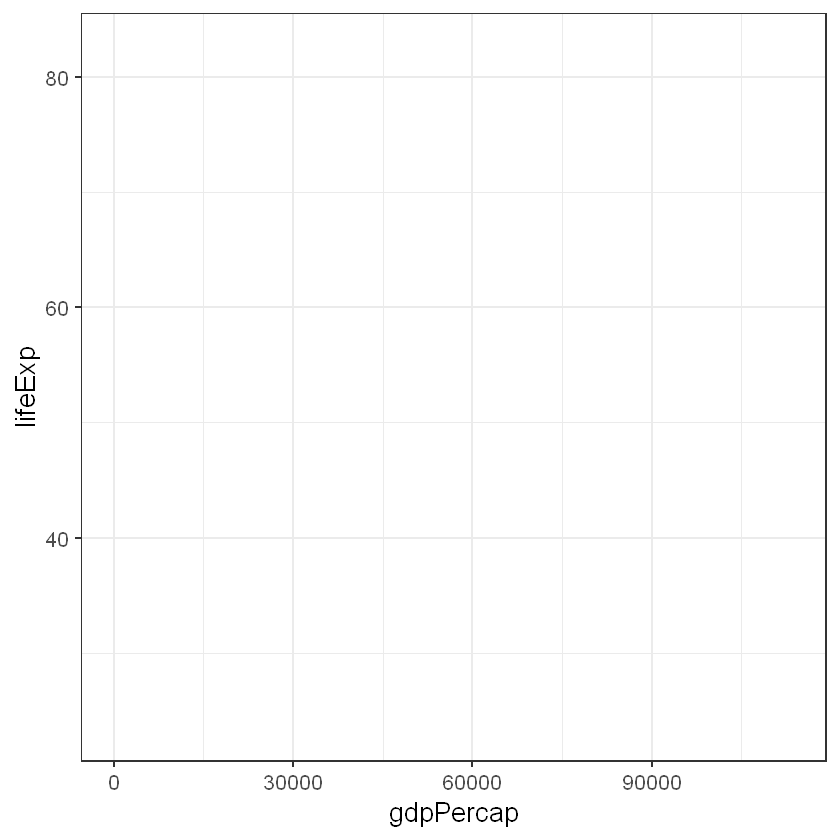

In [10]:

ggplot(gm, aes(x = gdpPercap, y = lifeExp))

When we do that we get a blank canvas with no data showing (you might get an error if you're using an old version of ggplot2). That's because all we've done is laid out a two-dimensional plot specifying what goes on the x and y axes, but we haven't told it what kind of geometric object to plot. The obvious choice here is a point. Check out [docs.ggplot2.org](http://docs.ggplot2.org/) to see what kind of geoms are available.

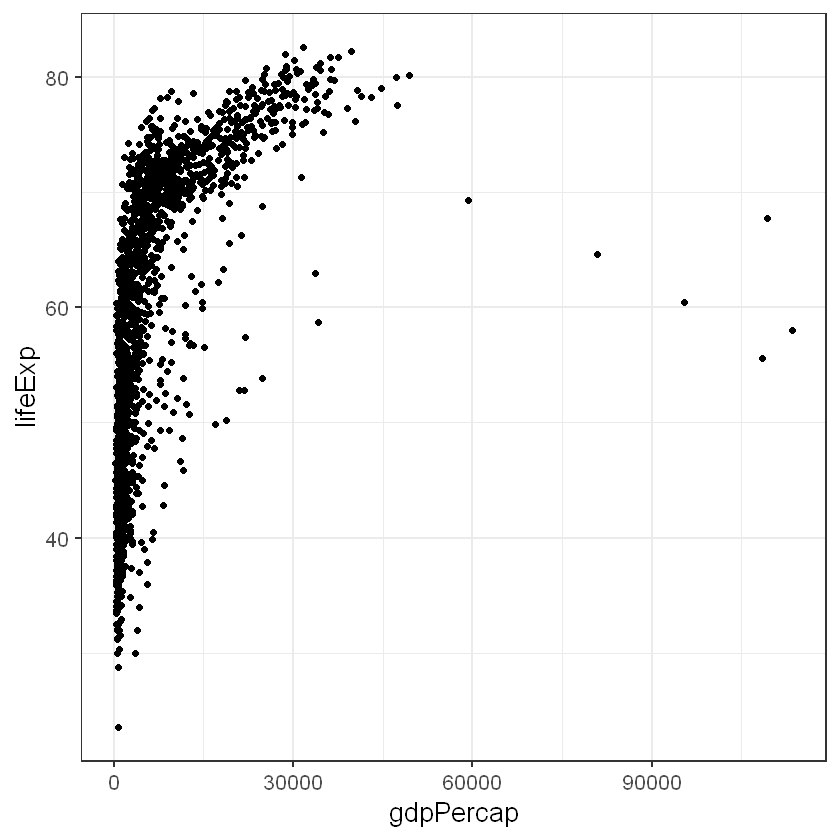

In [11]:

ggplot(gm, aes(x = gdpPercap, y = lifeExp)) + geom_point()

Here, we've built our plot in layers. First, we create a canvas for plotting layers to come using the `ggplot` function, specifying which **data** to use (here, the **gm** data frame), and an **aesthetic mapping** of `gdpPercap` to the x-axis and `lifeExp` to the y-axis. We next add a layer to the plot, specifying a **geom**, or a way of visually representing the aesthetic mapping.

Now, the typical workflow for building up a ggplot2 plot is to first construct the figure and save that to a variable (for example, `p`), and as you're experimenting, you can continue to re-define the `p` object as you develop "keeper commands".

First, let's construct the graphic. Notice that we don't have to specify `x=` and `y=` if we specify the arguments in the correct order (x is first, y is second).

In [12]:

p <- ggplot(gm, aes(gdpPercap, lifeExp))

The p object now contains the canvas, but nothing else. Try displaying it by just running p. Let's experiment with adding points and a different scale to the x-axis.

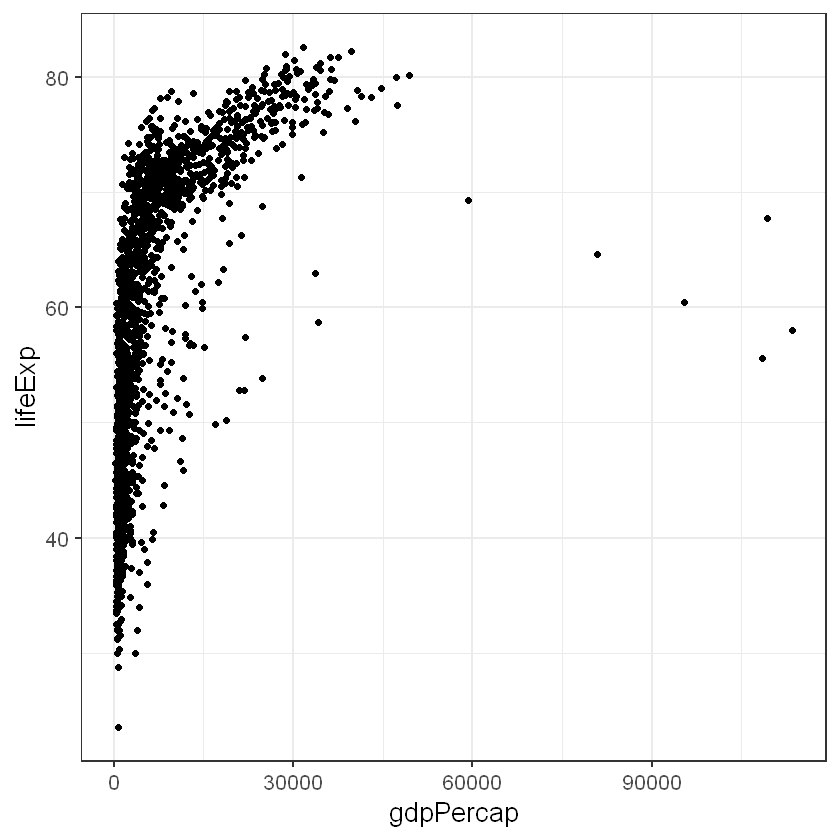

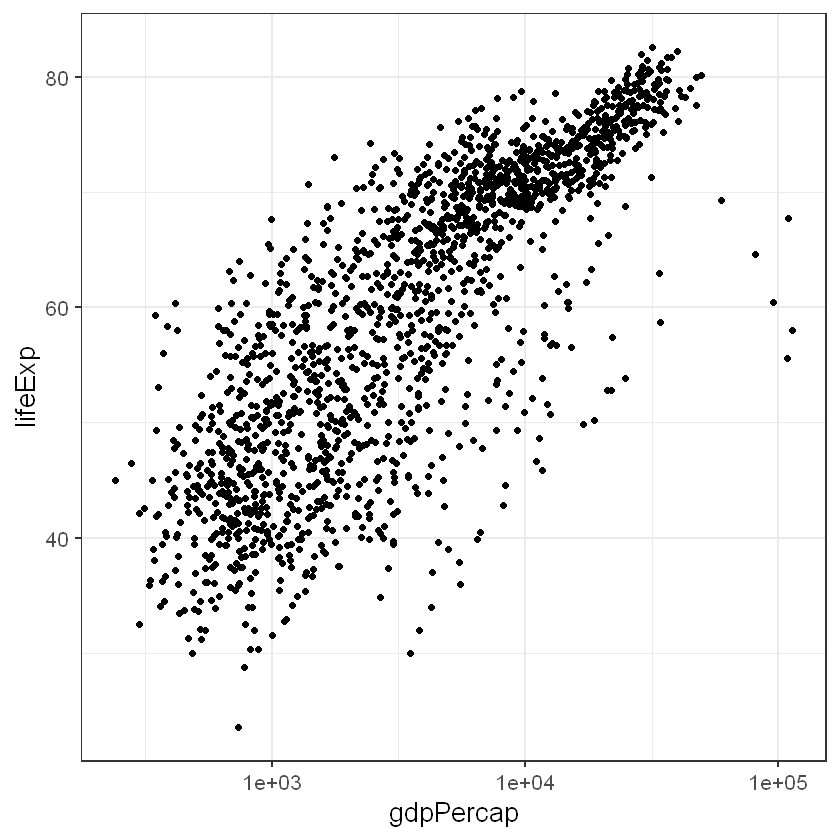

In [13]:

# Experiment with adding points
p + geom_point()

# Experiment with a different scale
p + geom_point() + scale_x_log10()

I like the look of using a log scale for the x-axis. Let's make that stick.

In [14]:

p <- p + scale_x_log10()

Now, if we re-ran p still nothing would show up because the p object just contains a blank canvas. Now, re-plot again with a layer of points:

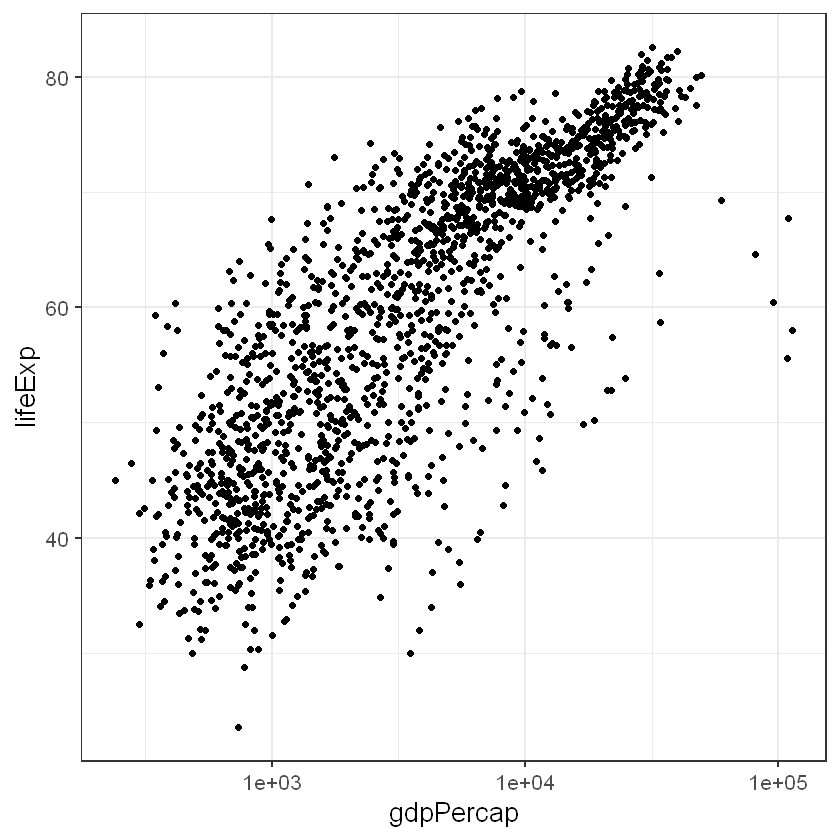

In [15]:
p + geom_point()

Now notice what I've saved to `p` at this point: only the basic plot layout and the log10 mapping on the x-axis. I didn't save any layers yet because I want to fiddle around with the points for a bit first.

Above we implied the aesthetic mappings for the x- and y- axis should be `gdpPercap` and `lifeExp`, but we can also add aesthetic mappings to the geoms themselves. For instance, what if we wanted to color the points by the value of another variable in the dataset, say, continent?

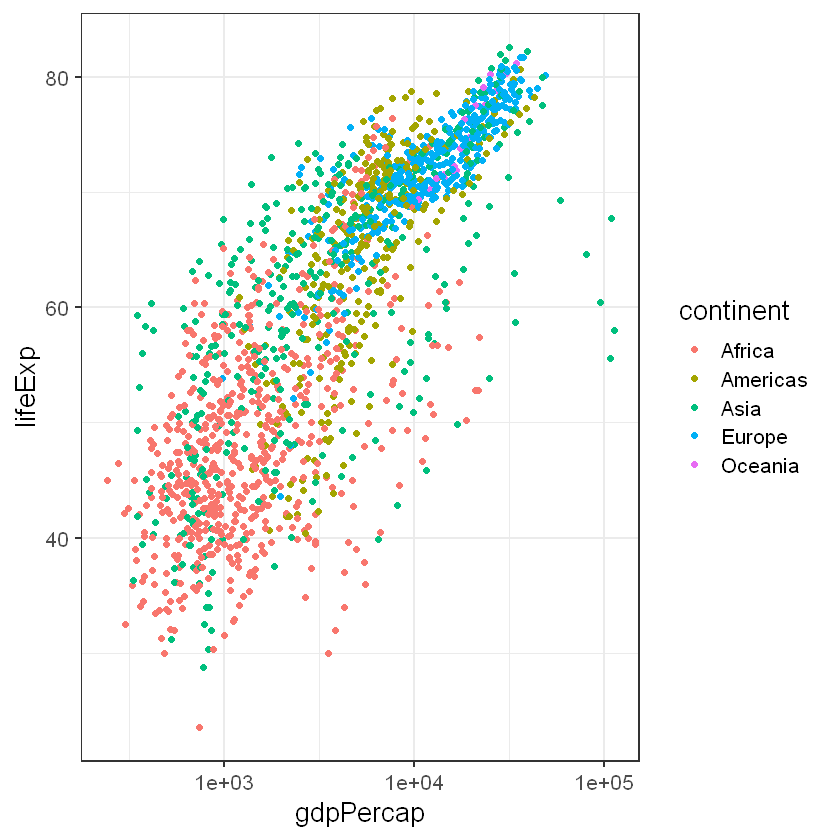

In [16]:
p + geom_point(aes(color=continent))

Notice the difference here. If I wanted the colors to be some static value, I wouldn't wrap that in a call to `aes()`. I would just specify it outright. Same thing with other features of the points. For example, lets make all the points huge (`size=8`) blue (`color="blue"`) semitransparent (`alpha=(1/4)`) triangles (`pch=17`):

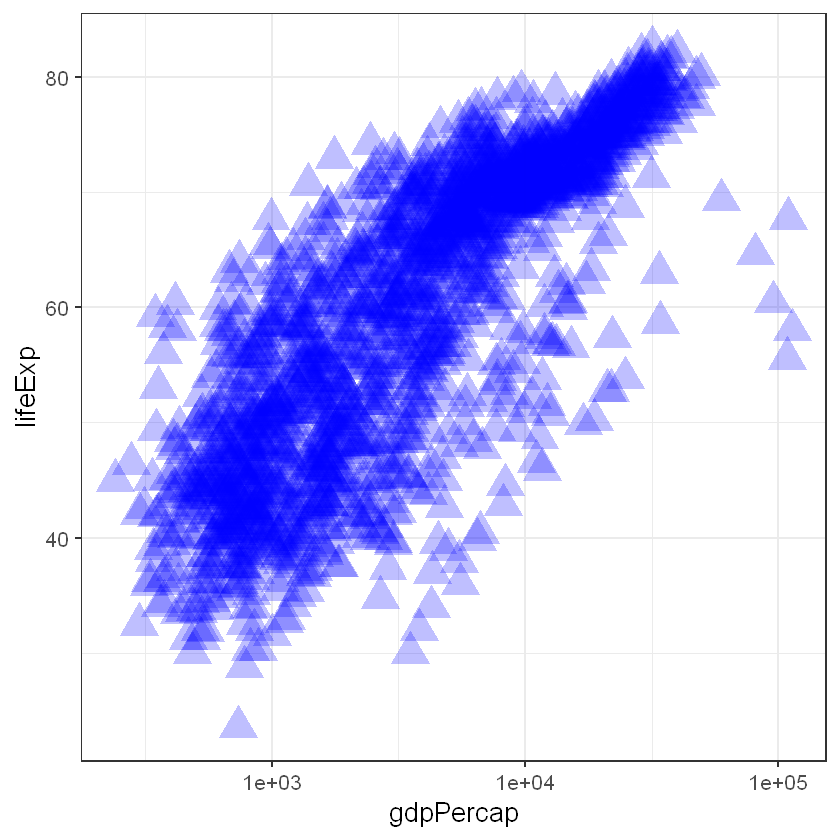

In [17]:
p + geom_point(color="blue", pch=17, size=8, alpha=1/4)

Now, this time, let's map the aesthetics of the point character to certain features of the data. For instance, let's give the points different colors and character shapes according to the continent, and map the size of the point onto the life Expectancy:

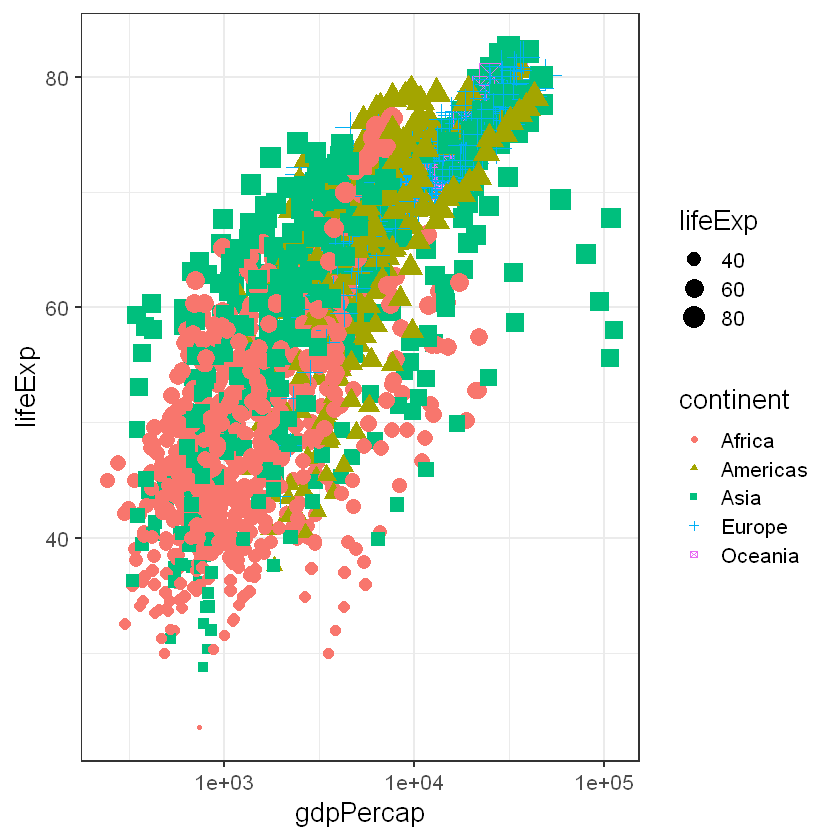

In [18]:
p + geom_point(aes(col=continent, shape=continent, size=lifeExp))

Now, this isn't a great plot because there are several aesthetic mappings that are redundant. Life expectancy is mapped to both the y-axis and the size of the points – the size mapping is superfluous. Similarly, continent is mapped to both the color and the point character (the shape is superfluous). Let's get rid of that, but let's make the points a little bigger outsize of an aesthetic mapping.

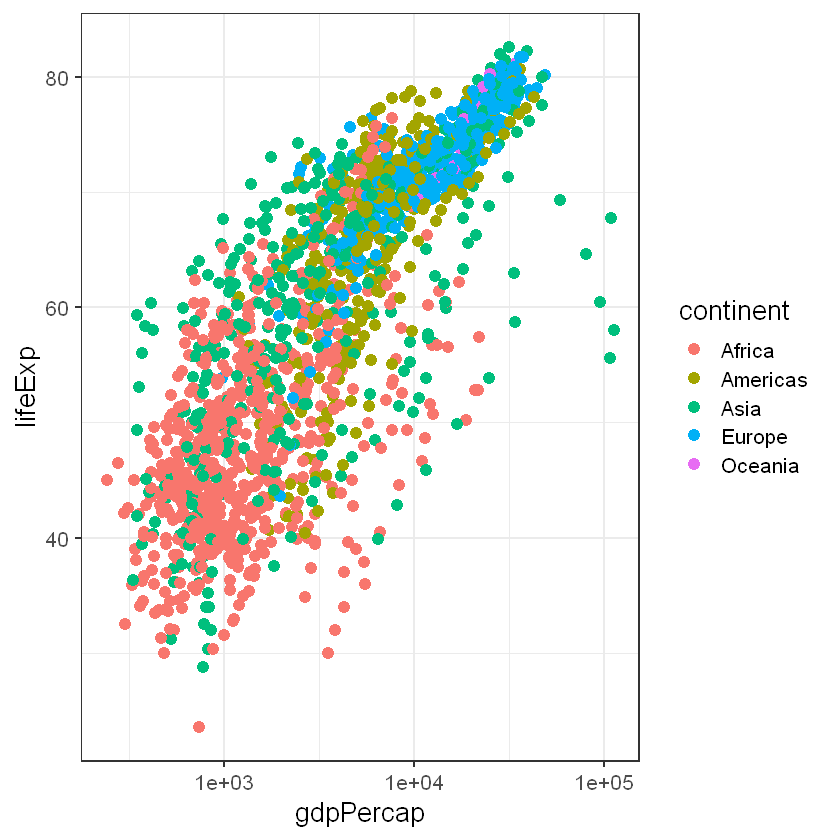

In [19]:

p + geom_point(aes(col=continent), size=3)

\begin{exercise}
Re-create this same plot from scratch without saving anything to a variable. That is, start from the `ggplot` call.

-   Start with the `ggplot()` function.

-   Use the gm data.

-   Map `gdpPercap` to the x-axis and `lifeExp` to the y-axis.

-   Add points to the plot

    -   Make the points size 3
    -   Map continent onto the aesthetics of the point

-   Use a log<sub>10</sub> scale for the x-axis.


\end{exercise}

In [1]:
#your code

### Adding layers

Let's add a fitted curve to the points. Recreate the plot in the p object if you need to.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



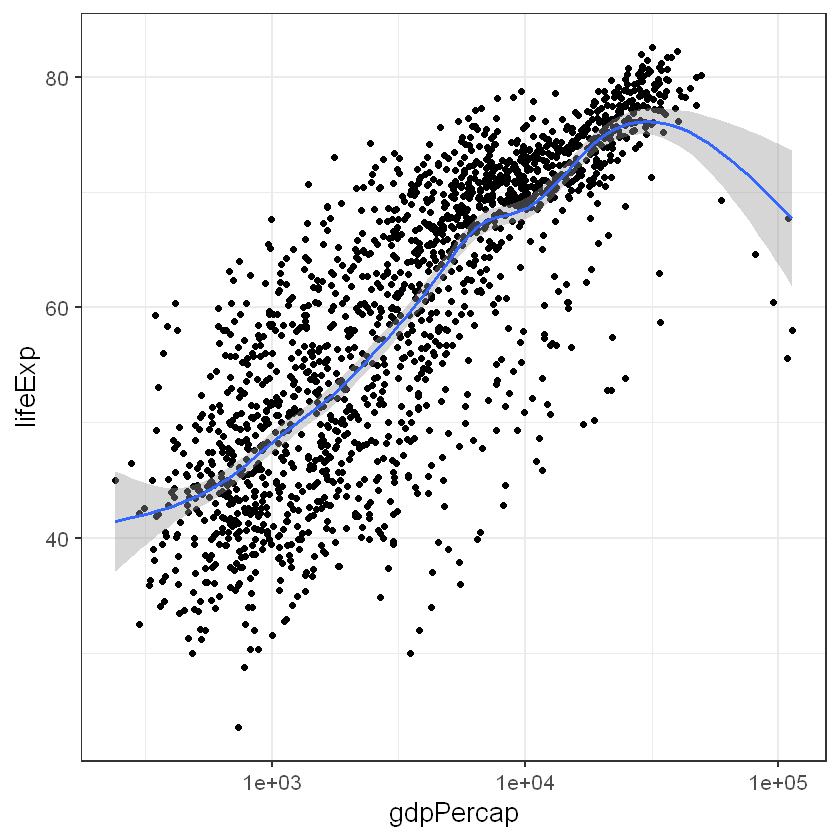

In [22]:

p <- ggplot(gm, aes(gdpPercap, lifeExp)) + scale_x_log10()
p + geom_point() + geom_smooth()

By default `geom_smooth()` will try to lowess for data with n\<1000 or generalized additive models for data with n\>1000. We can change that behavior by tweaking the parameters to use a thick red line, use a linear model instead of a GAM, and to turn off the standard error stripes.

`geom_smooth()` using formula 'y ~ x'



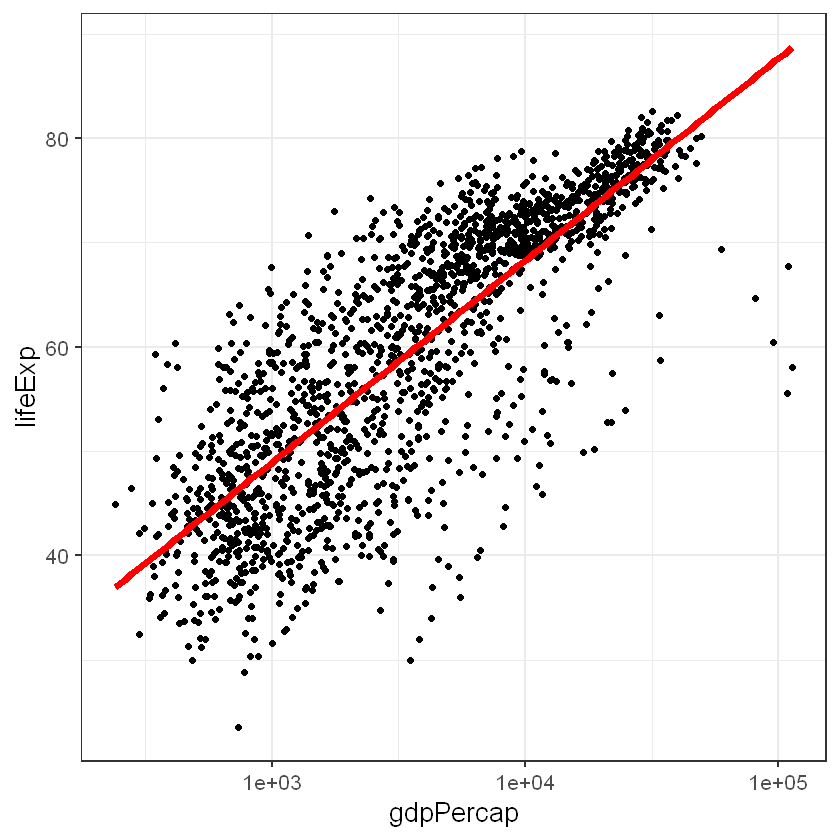

In [23]:
p + geom_point() + geom_smooth(lwd=2, se=FALSE, method="lm", col="red")

But let's add back in our aesthetic mapping to the continents. Notice what happens here. We're mapping continent as an aesthetic mapping *to the color of the points only* -- so `geom_smooth()` still works only on the entire data.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



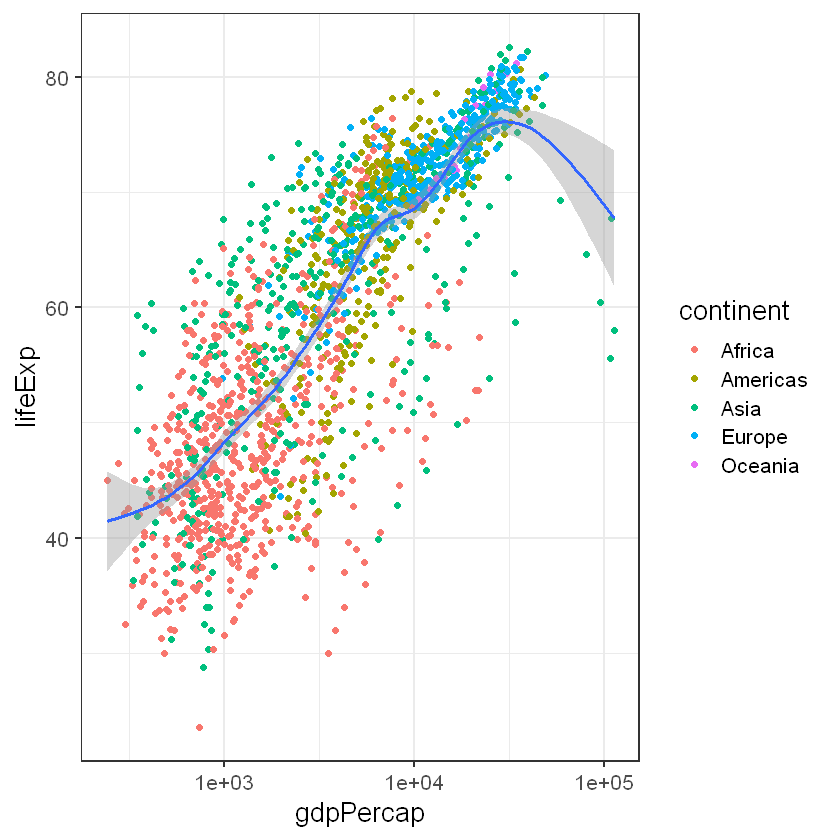

In [24]:
p + geom_point(aes(color = continent)) + geom_smooth()

But notice what happens here: we make the call to `aes()` outside of the `geom_point()` call, and the continent variable gets mapped as an aesthetic to any further geoms. So here, we get separate smoothing lines for each continent. Let's do it again but remove the standard error stripes and make the lines a bit thicker.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



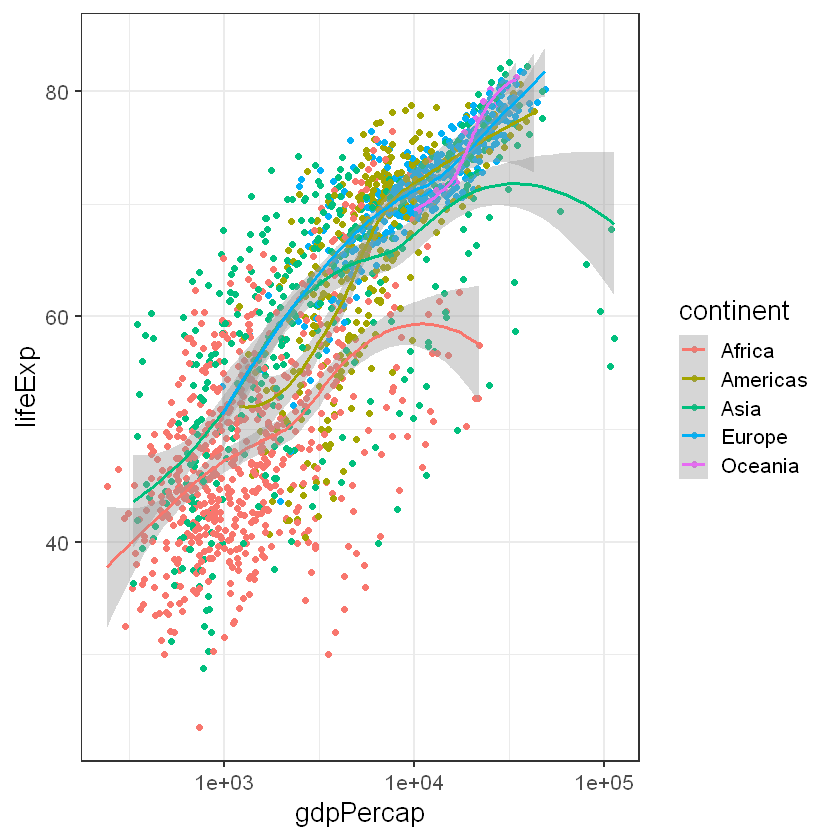

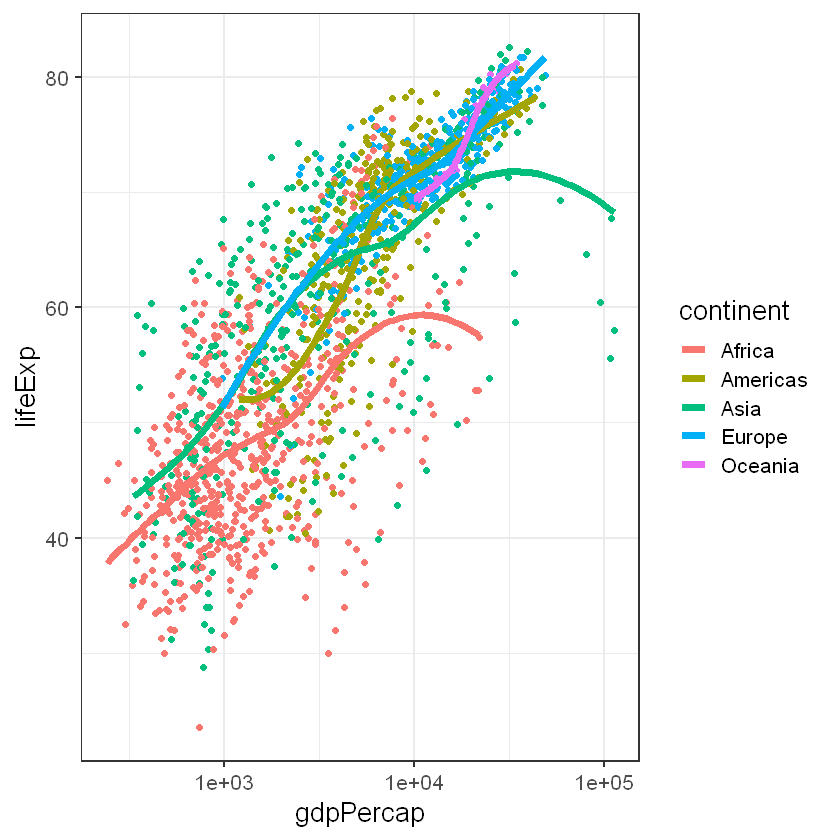

In [25]:
p + aes(color = continent) + geom_point() + geom_smooth()
p + aes(color = continent) + geom_point() + geom_smooth(se=F, lwd=2)

### Faceting

Facets display subsets of the data in different panels. There are a couple ways to do this, but `facet_wrap()` tries to sensibly wrap a series of facets into a 2-dimensional grid of small multiples. Just give it a formula specifying which variables to facet by. We can continue adding more layers, such as smoothing. If you have a look at the help for `?facet_wrap()` you'll see that we can control how the wrapping is laid out.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



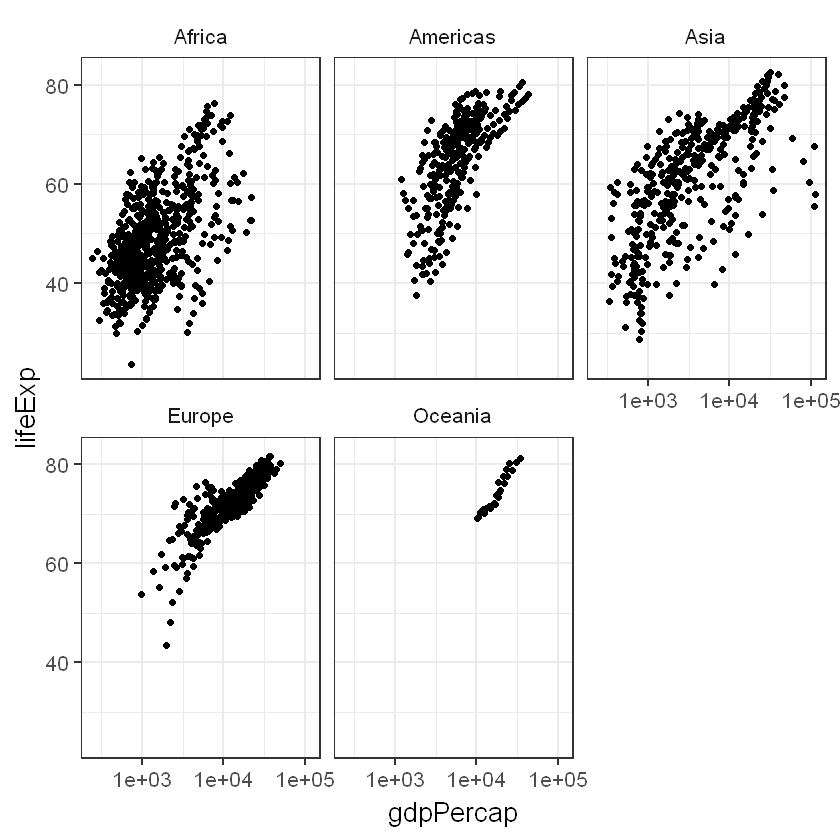

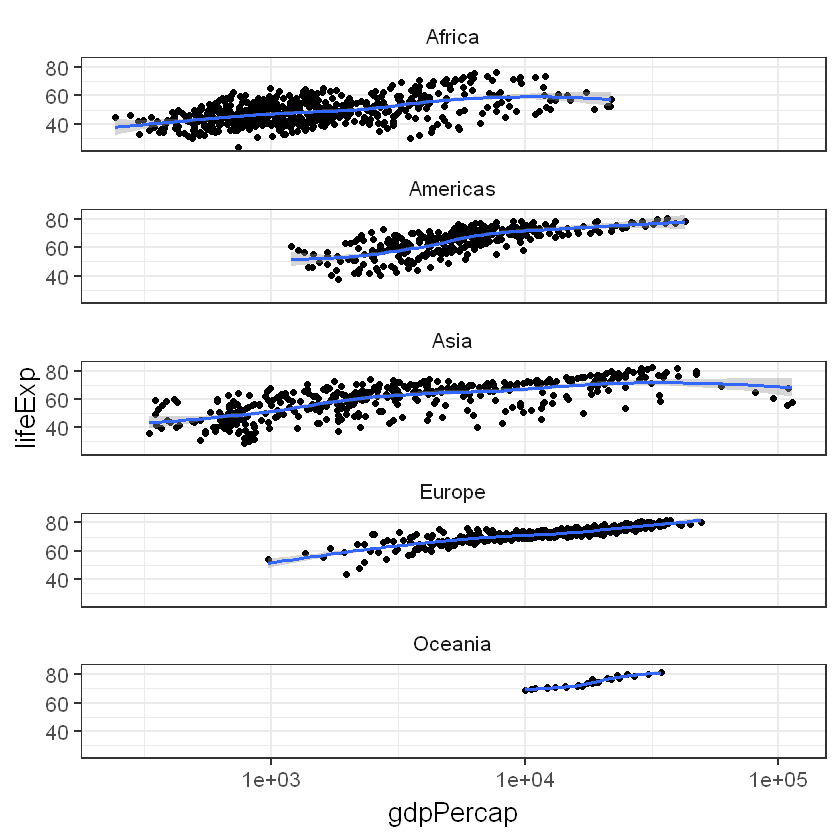

In [26]:
p + geom_point() + facet_wrap(~continent)
p + geom_point() + geom_smooth() + facet_wrap(~continent, ncol=1)

### Saving plots

There are a few ways to save ggplots. The quickest way, that works in an interactive session, is to use the `ggsave()` function. You give it a file name and by default it saves the last plot that was printed to the screen.

Saving 6.67 x 6.67 in image



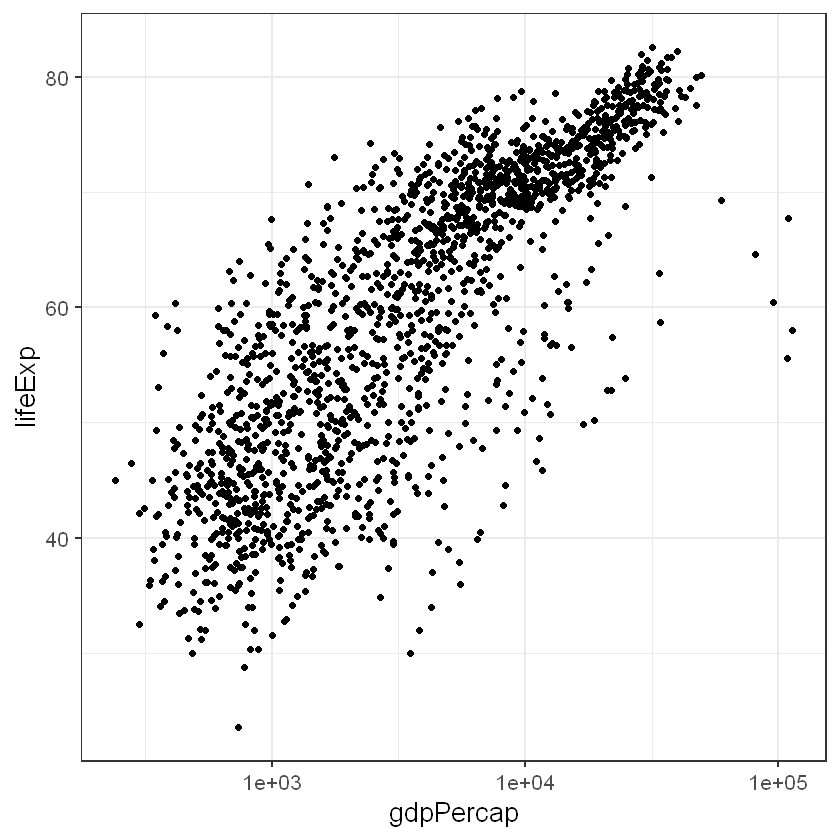

In [27]:
p + geom_point()
ggsave(file="myplot.png")

But if you're running this through a script, the best way to do it is to pass `ggsave()` the object containing the plot that is meant to be saved. We can also adjust things like the width, height, and resolution. `ggsave()` also recognizes the name of the file extension and saves the appropriate kind of file. Let's save a PDF.

In [28]:
pfinal <- p + geom_point() + geom_smooth() + facet_wrap(~continent, ncol=1)
ggsave(pfinal, file="myplot.pdf", width=5, height=15)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



\begin{exercise}
1.  Make a scatter plot of `lifeExp` on the y-axis against `year` on the x.
2.  Make a series of small multiples faceting on continent.
3.  Add a fitted curve, smooth or lm, with and without facets.
4.  **Bonus**: using `geom_line()` and and aesthetic mapping `country` to `group=`, make a "spaghetti plot", showing *semitransparent* lines connected for each country, faceted by continent. Add a smoothed loess curve with a thick (`lwd=3`) line with no standard error stripe. Reduce the opacity (`alpha=`) of the individual black lines. *Don't* show Oceania countries (that is, `filter()` the data where `continent!="Oceania"` before you plot it).
\end{exercise}

In [2]:
# your code

### Plotting bivariate data: continuous Y by categorical X

With the last example we examined the relationship between a continuous Y variable against a continuous X variable. A scatter plot was the obvious kind of data visualization. But what if we wanted to visualize a continuous Y variable against a categorical X variable? We sort of saw what that looked like in the last exercise. `year` is a continuous variable, but in this dataset, it's broken up into 5-year segments, so you could almost think of each year as a categorical variable. But a better example would be life expectancy against continent or country.

First, let's set up the basic plot:

In [32]:
p <- ggplot(gm, aes(continent, lifeExp)) 

Then add points:

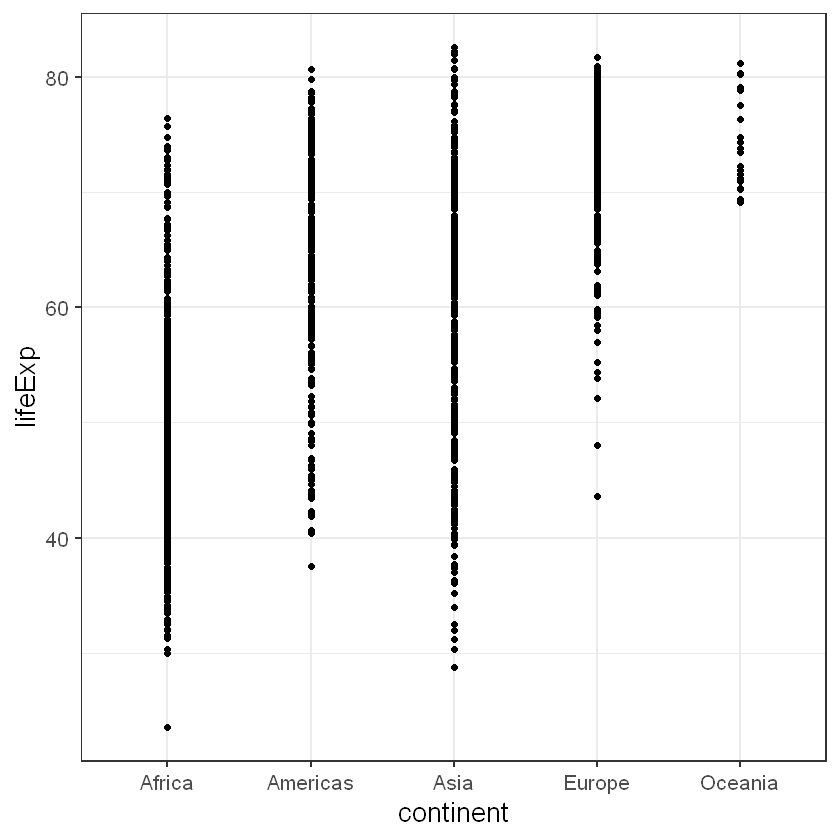

In [33]:
p + geom_point()

That's not terribly useful. There's a big overplotting problem. We can try to solve with transparency:

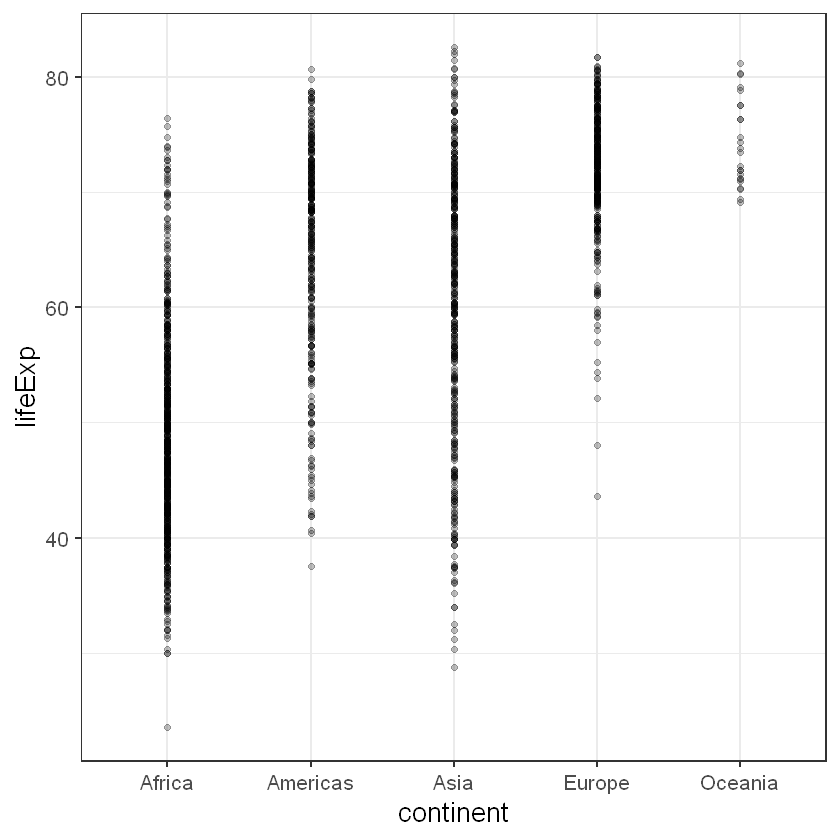

In [34]:
p + geom_point(alpha=1/4)

But that really only gets us so far. What if we spread things out by adding a little bit of horizontal noise (aka "jitter") to the data.

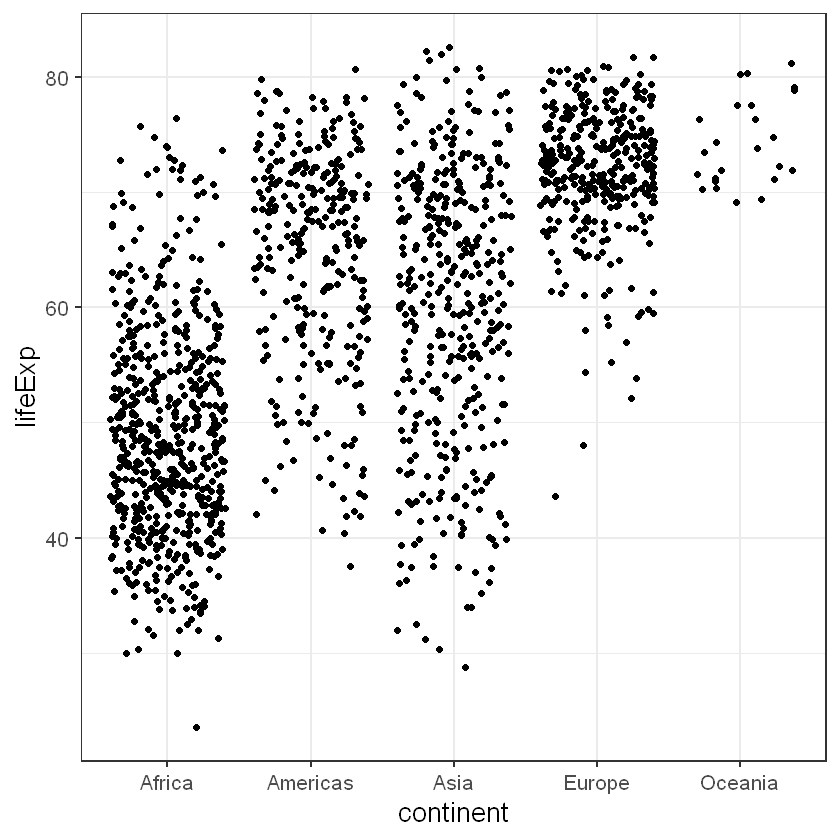

In [35]:
p + geom_jitter()

Note that the little bit of horizontal noise that's added to the jitter is random. If you run that command over and over again, each time it will look slightly different. The idea is to visualize the density at each vertical position, and spreading out the points horizontally allows you to do that. If there were still lots of over-plotting you might think about adding some transparency by setting the alpha= value for the jitter.

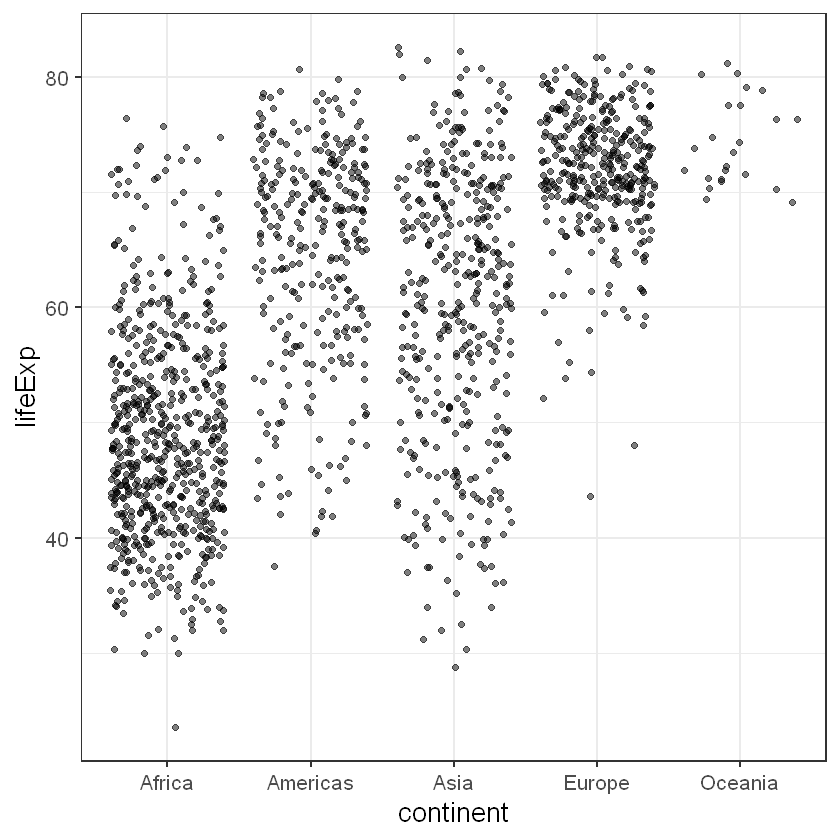

In [36]:
p + geom_jitter(alpha=1/2)

Probably a more common visualization is to show a box plot:

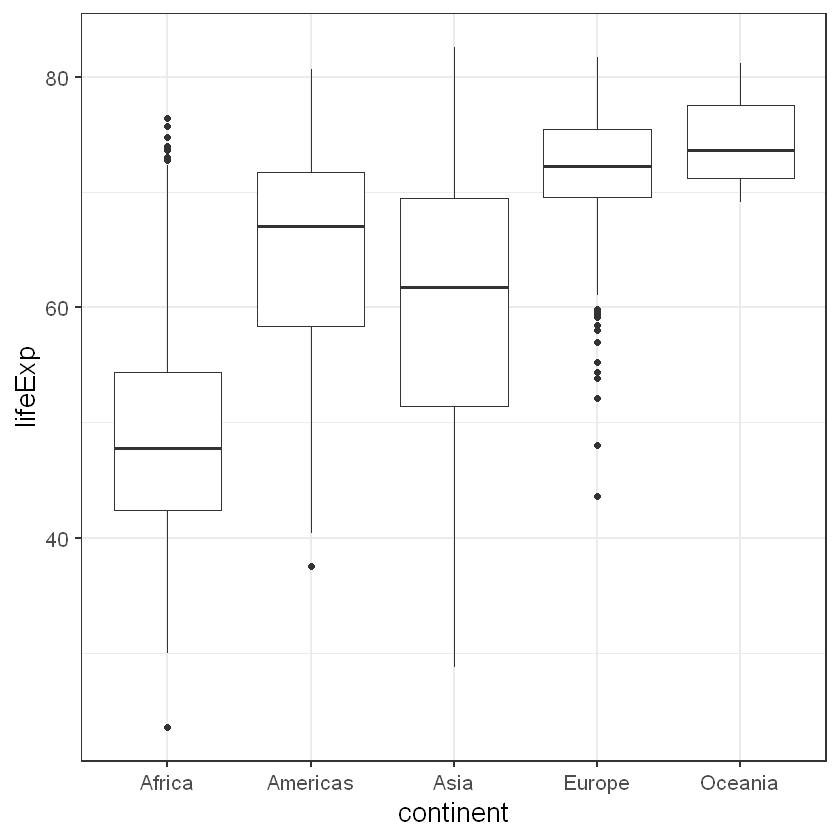

In [37]:
p + geom_boxplot()

But why not show the summary and the raw data?

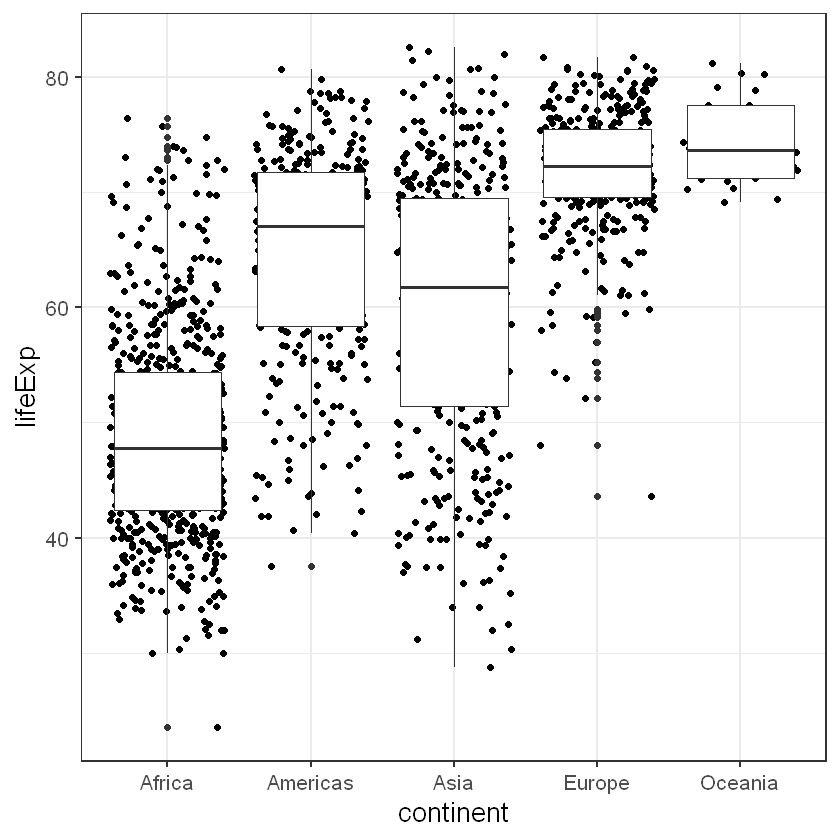

In [38]:
p + geom_jitter() + geom_boxplot()

Notice how in that example we first added the jitter layer then added the boxplot layer. But the boxplot is now superimposed over the jitter layer. Let's make the jitter layer go on top. Also, go back to just the boxplots. Notice that the outliers are represented as points. But there's no distinction between the outlier point from the boxplot geom and all the other points from the jitter geom. Let's change that. 

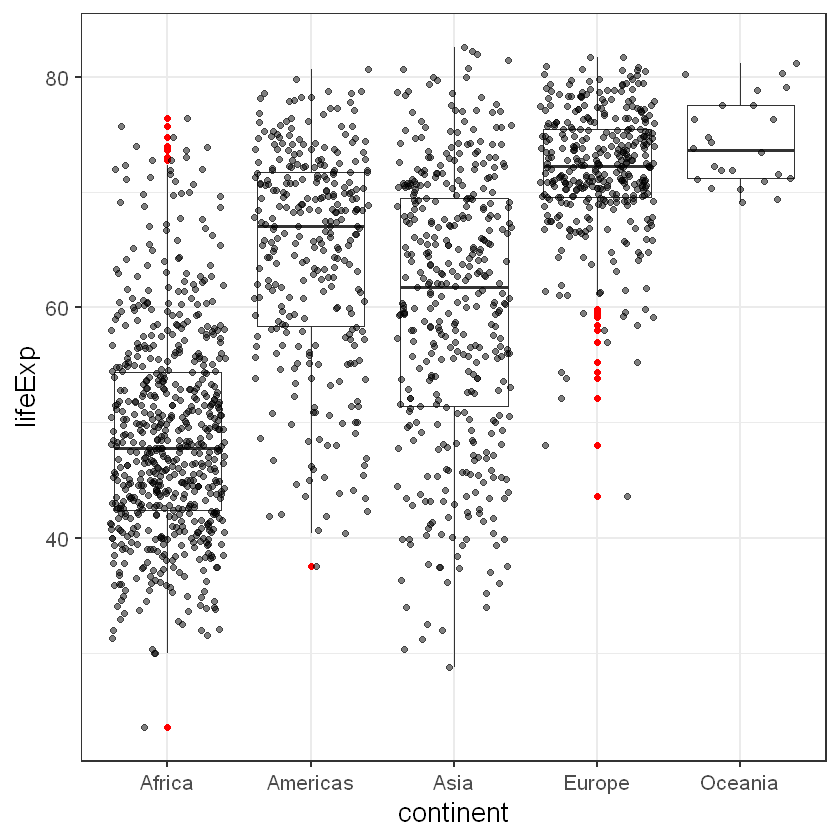

In [39]:
p + geom_boxplot(outlier.colour = "red") + geom_jitter(alpha=1/2)

There's another geom that's useful here, called a voilin plot.

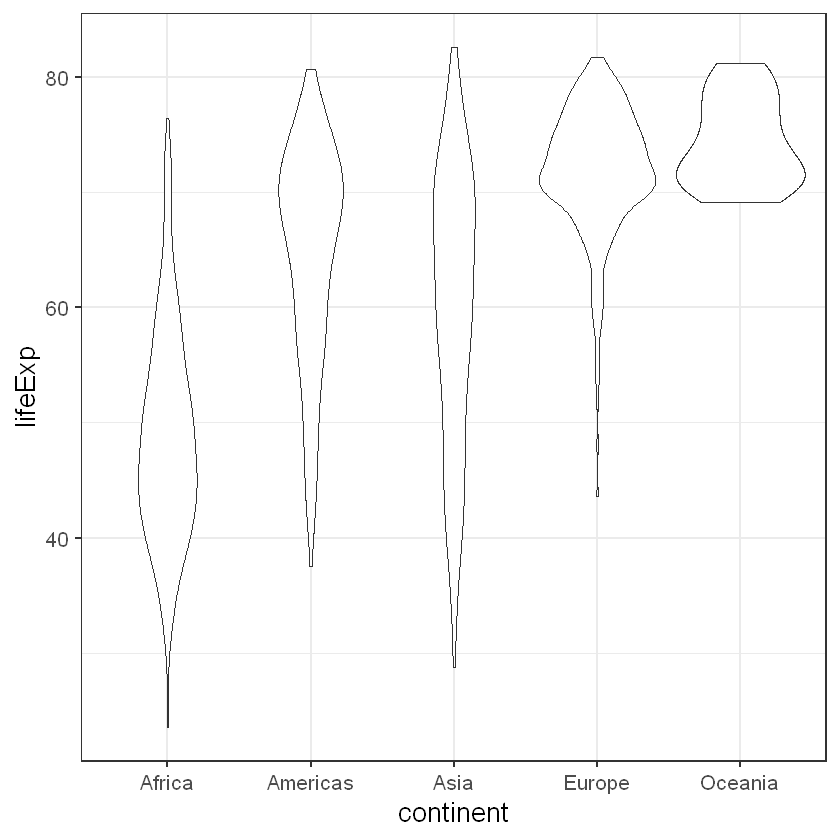

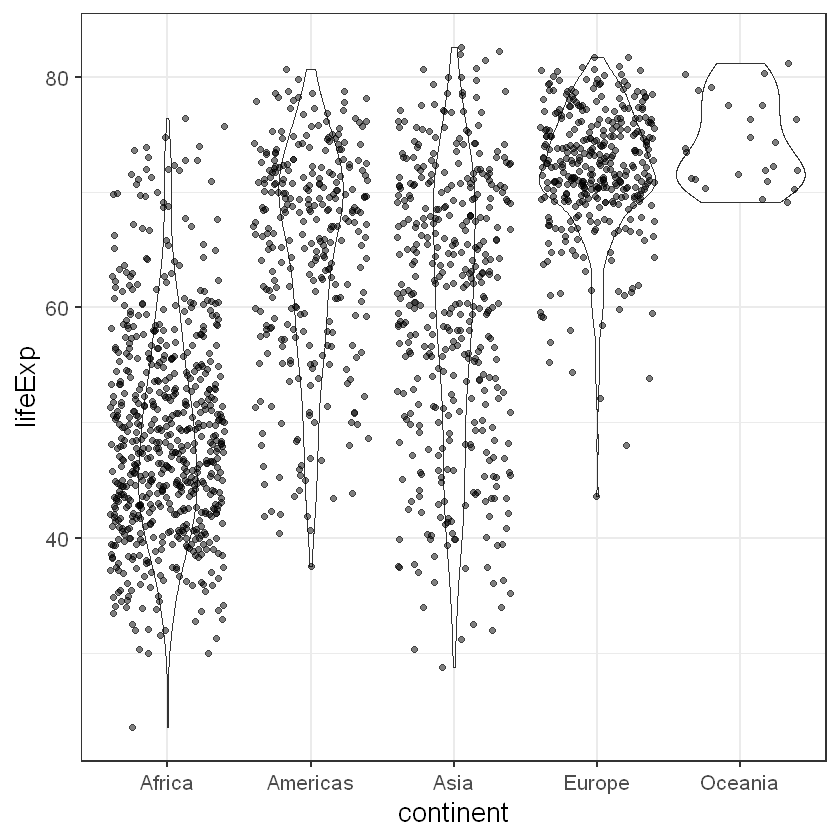

In [40]:
p + geom_violin()

p + geom_violin() + geom_jitter(alpha=1/2)

Let's go back to our boxplot for a moment.

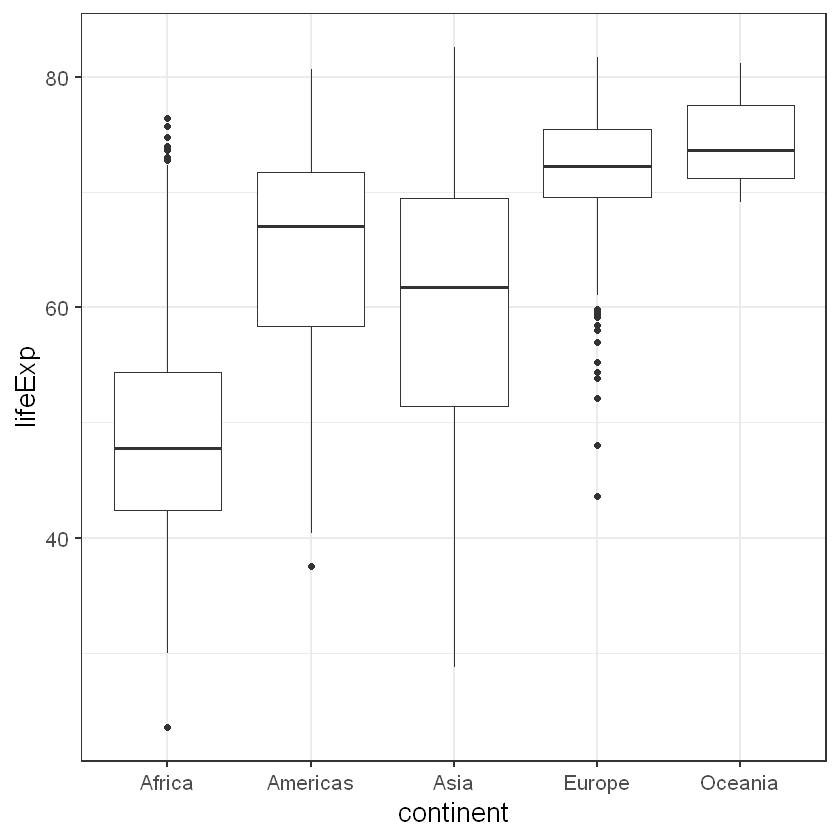

In [41]:
p + geom_boxplot()

This plot would be a lot more effective if the continents were shown in some sort of order other than alphabetical. To do that, we'll have to go back to our basic build of the plot again and use the reorder function in our original aesthetic mapping. Here, reorder is taking the first variable, which is some categorical variable, and ordering it by the level of the mean of the second variable, which is a continuous variable. It looks like this

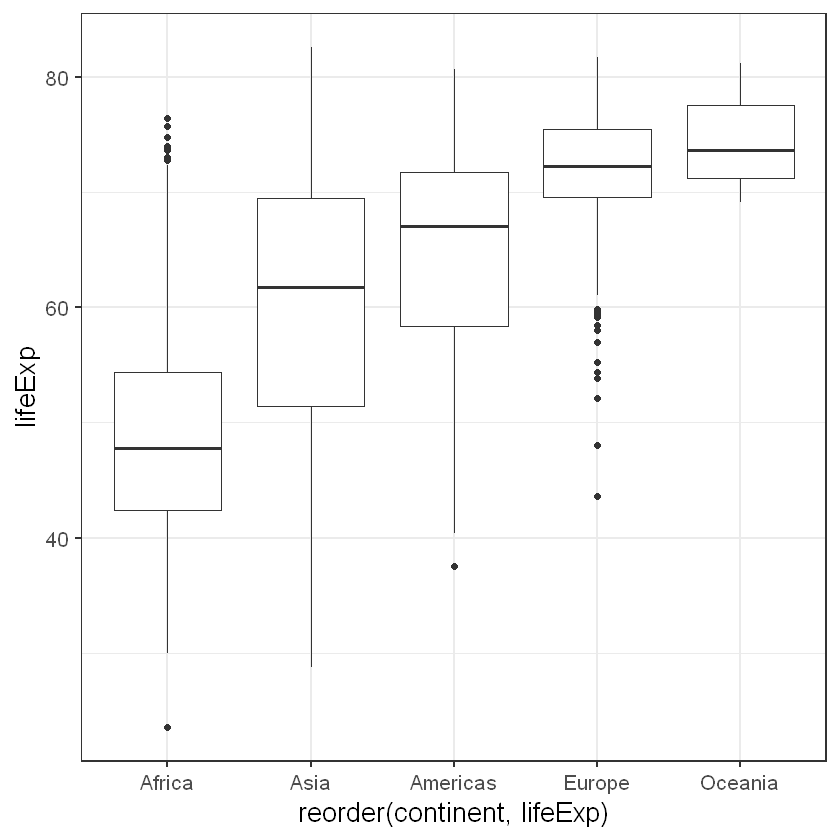

In [43]:
p <- ggplot(gm, aes(x=reorder(continent, lifeExp), y=lifeExp))


p + geom_boxplot()

\begin{exercise}

1.  Make a jittered strip plot of GDP per capita against continent.
2.  Make a box plot of GDP per capita against continent.
3.  Using a log<sub>10</sub> y-axis scale, overlay semitransparent jittered points on top of box plots, where outlying points are colored.
4.  **BONUS**: Try to reorder the continents on the x-axis by GDP per capita. Why isn't this working as expected? See `?reorder` for clues.

\end{exercise}

In [3]:
# your code

## Plotting univariate continuous data

What if we just wanted to visualize distribution of a single continuous variable? A histogram is the usual go-to visualization. Here we only have one aesthetic mapping instead of two.

In [46]:
p <- ggplot(gm, aes(lifeExp))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



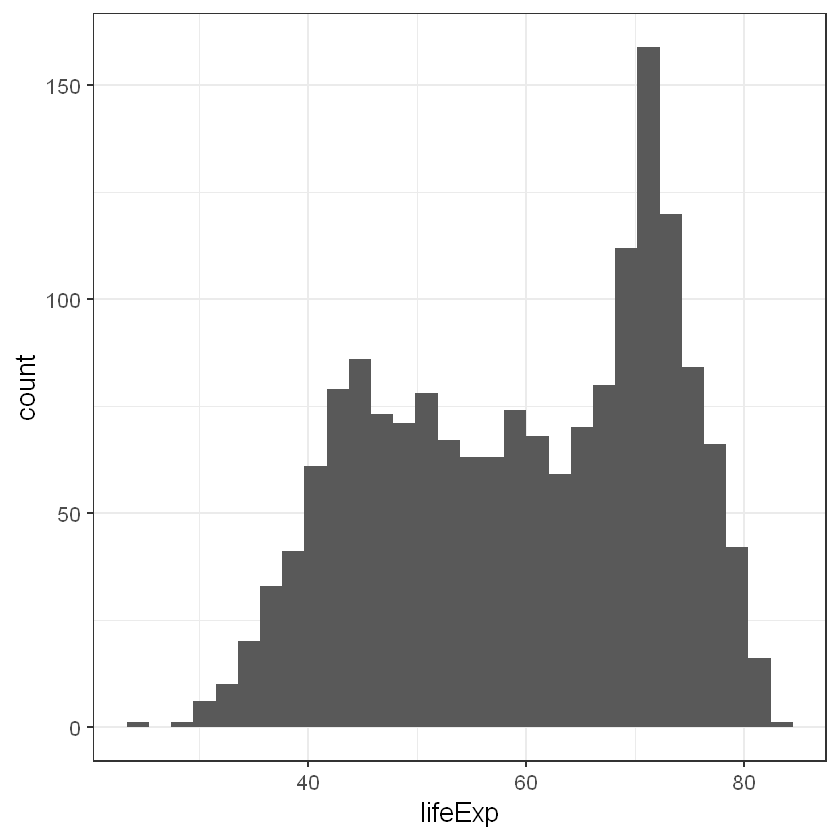

In [45]:
p + geom_histogram()

When we do this ggplot lets us know that we're automatically selecting the width of the bins, and we might want to think about this a little further.

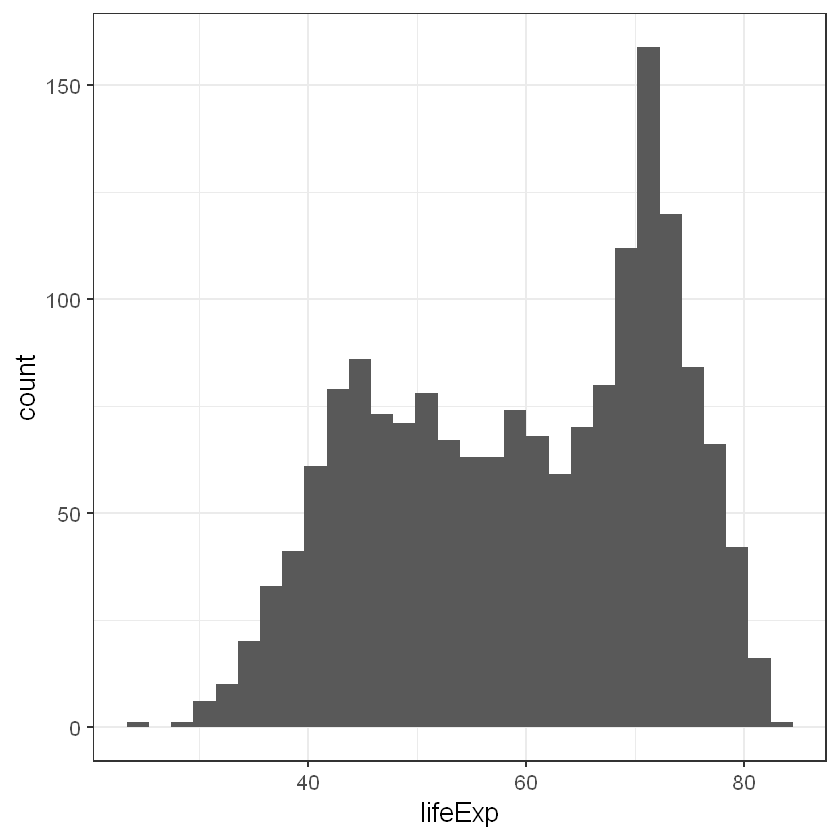

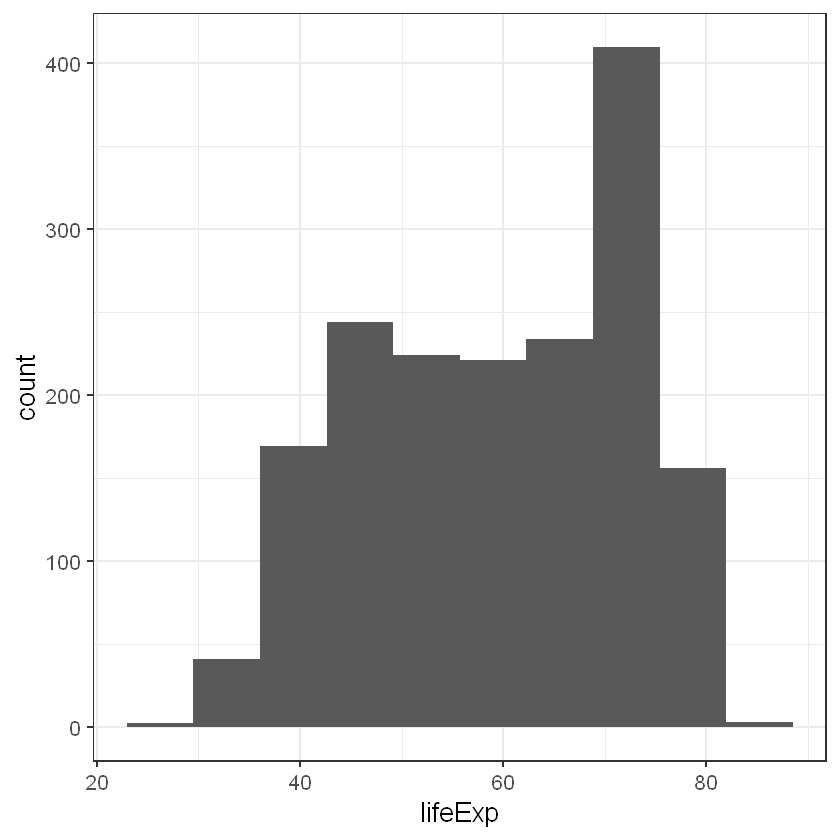

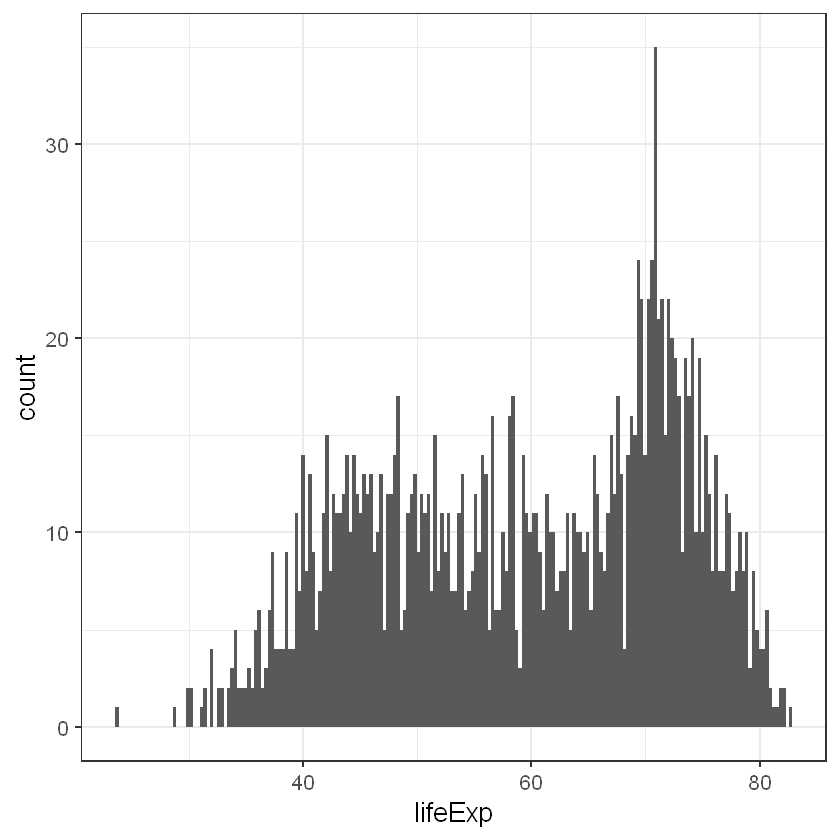

In [47]:
p + geom_histogram(bins=30)
p + geom_histogram(bins=10)
p + geom_histogram(bins=200)

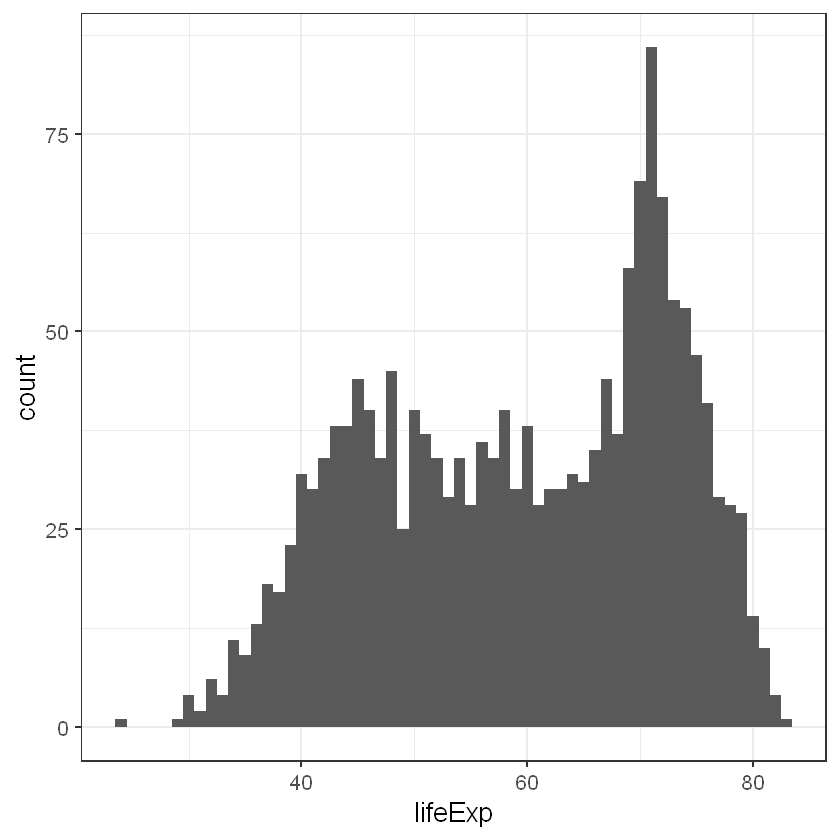

In [48]:
p + geom_histogram(bins=60)

Alternative we could plot a smoothed density curve instead of a histogram:

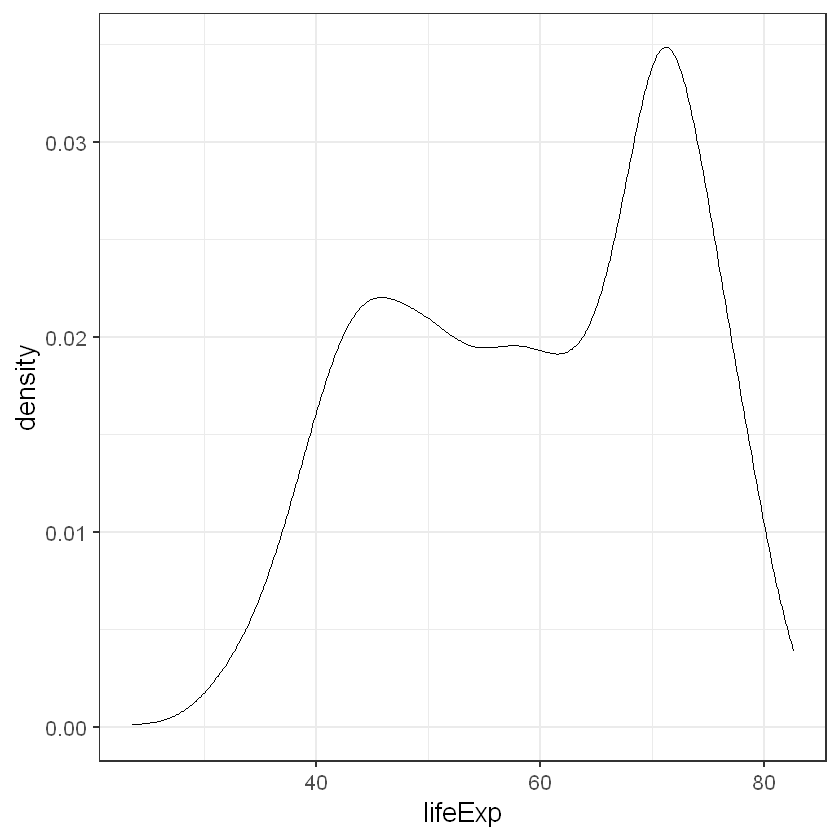

In [49]:
p + geom_density()

Back to histograms. What if we wanted to color this by continent?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



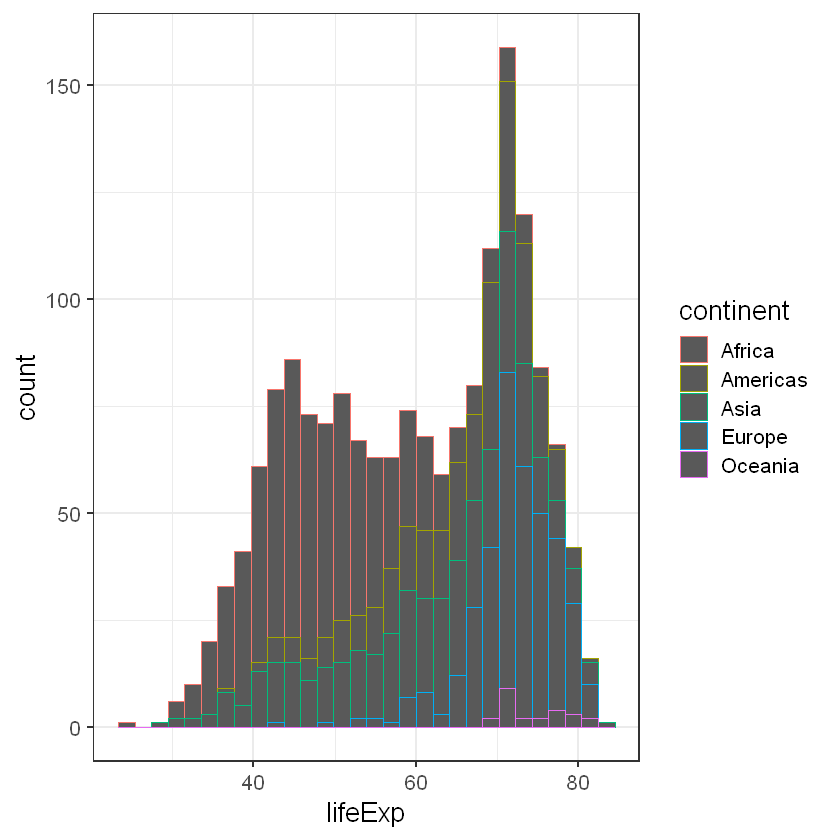

In [50]:
p + geom_histogram(aes(color=continent))

That's not what we had in mind. That's just the outline of the bars. We want to change the fill color of the bars.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



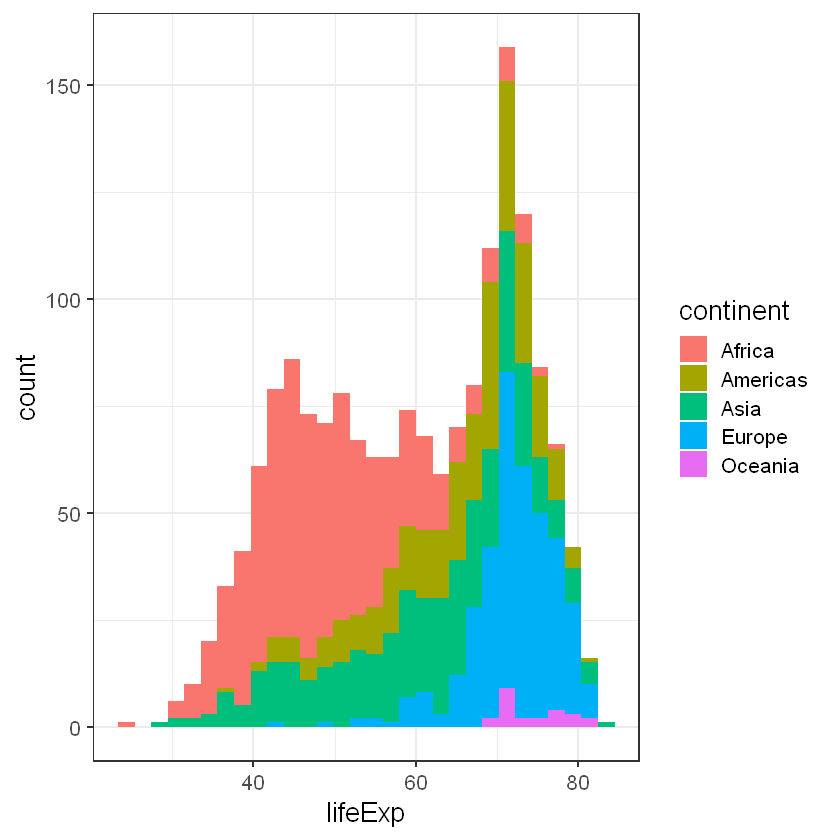

In [51]:
p + geom_histogram(aes(fill=continent))

Well, that's not exactly what we want either. If you look at the help for `?geom_histogram` you'll see that by default it stacks overlapping points. This isn't really an effective visualization. Let's change the position argument.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



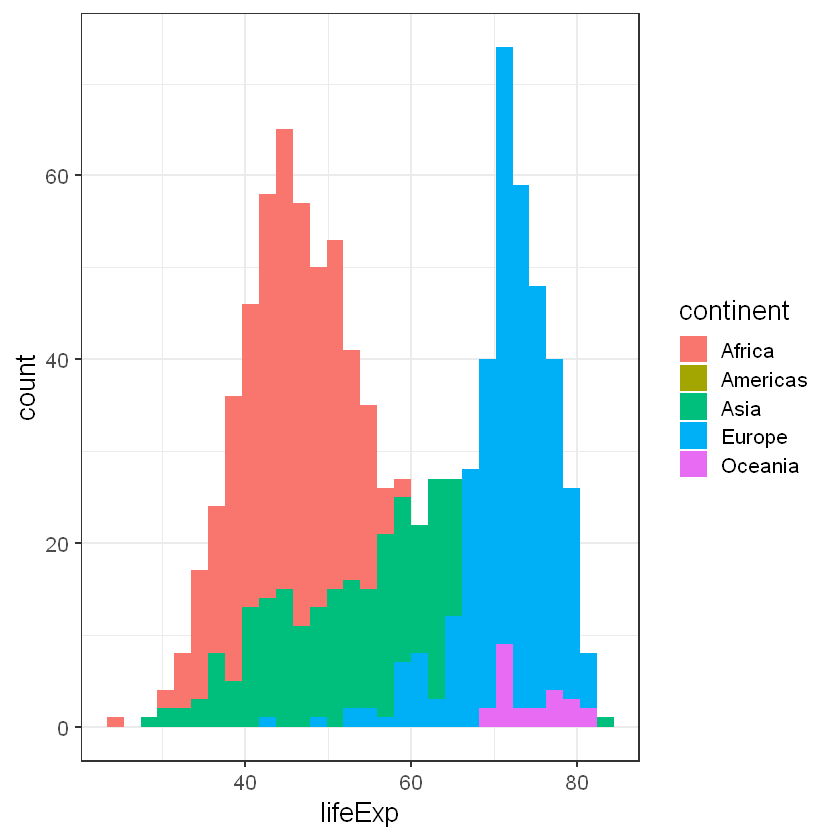

In [52]:
p + geom_histogram(aes(fill=continent), position="identity")

But the problem there is that the histograms are blocking each other. What if we tried transparency?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



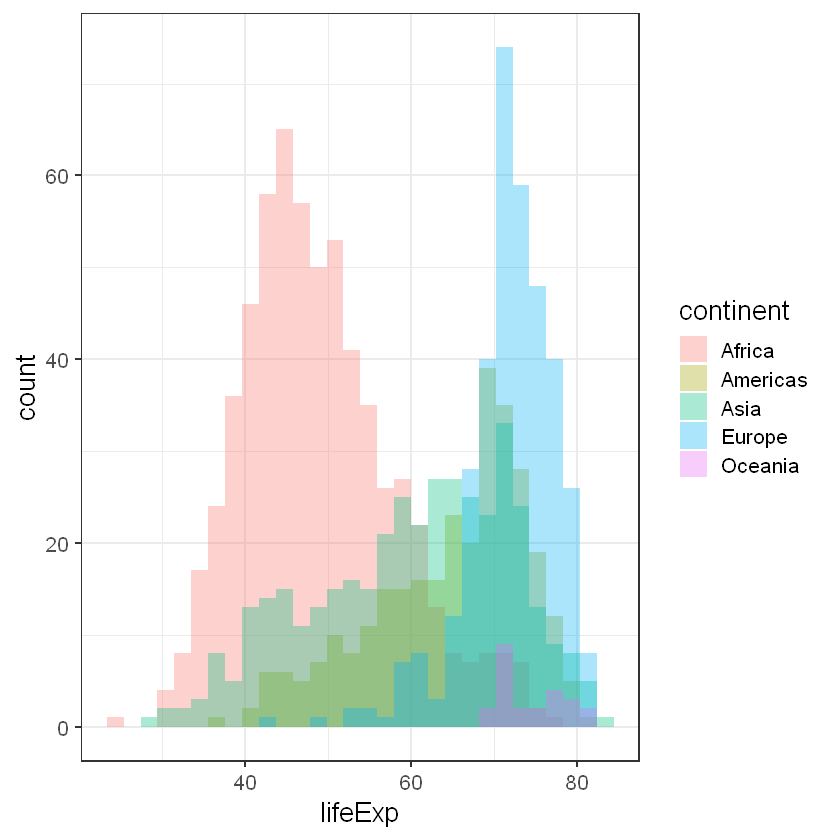

In [53]:
p + geom_histogram(aes(fill=continent), position="identity", alpha=1/3)

That's somewhat helpful, and might work for two distributions, but it gets cumbersome with 5. Let's go back and try this with density plots, first changing the color of the line:

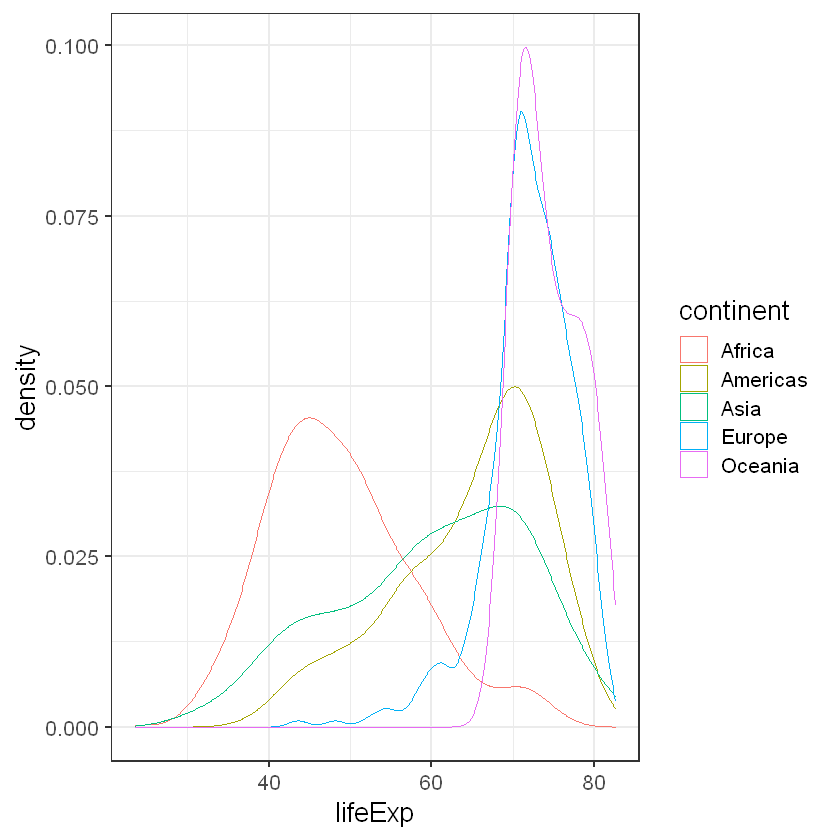

In [54]:
p + geom_density(aes(color=continent))

Then by changing the color of the fill and setting the transparency to 25%:

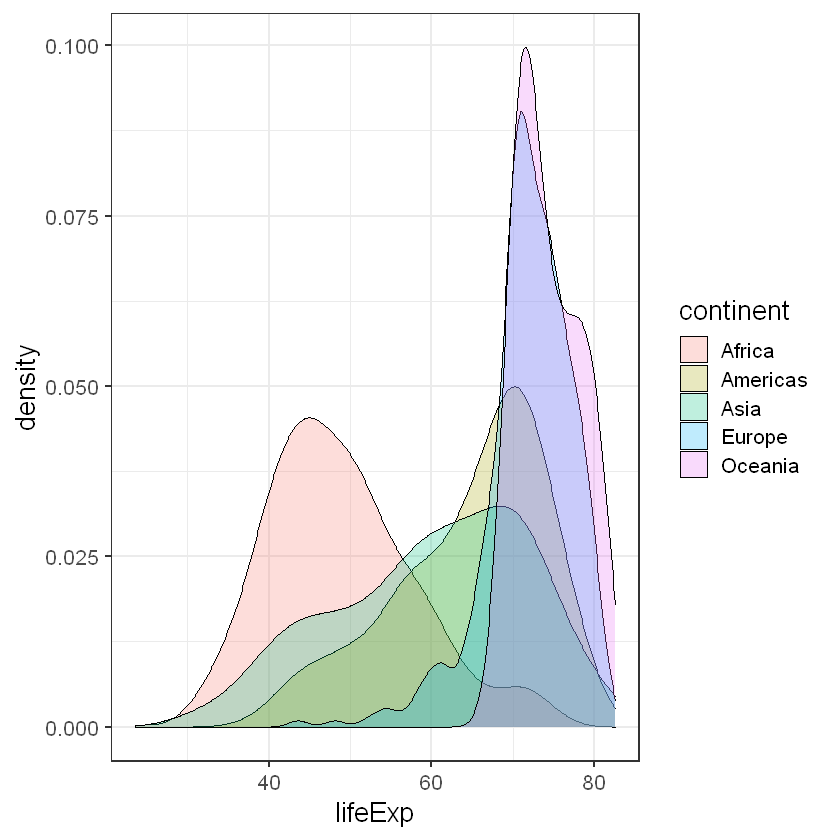

In [55]:
p + geom_density(aes(fill=continent), alpha=1/4)

\begin{exercise}
1.  Plot a histogram of GDP Per Capita.
2.  Do the same but use a log<sub>10</sub> x-axis.
3.  Still on the log<sub>10</sub> x-axis scale, try a density plot mapping continent to the fill of each density distribution, and reduce the opacity.
4.  Still on the log<sub>10</sub> x-axis scale, make a histogram faceted by continent *and* filled by continent. Facet with a single column (see `?facet_wrap` for help).
5.  Save this figure to a 6x10 PDF file.


\end{exercise}

In [4]:

# your code

## Publication-ready plots & themes

Let's make a plot we made earlier (life expectancy versus the log of GDP per capita with points colored by continent with lowess smooth curves overlaid without the standard error ribbon):

In [57]:
p <- ggplot(gm, aes(gdpPercap, lifeExp)) 
p <- p + scale_x_log10()
p <- p + aes(col=continent) + geom_point() + geom_smooth(lwd=2, se=FALSE)

Give the plot a title and axis labels:

In [58]:
p <- p + ggtitle("Life expectancy vs GDP by Continent")
p <- p + xlab("GDP Per Capita (USD)") + ylab("Life Expectancy (years)")

By default, the "gray" theme is the usual background (I've changed this course website to use the black and white background for all images).

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



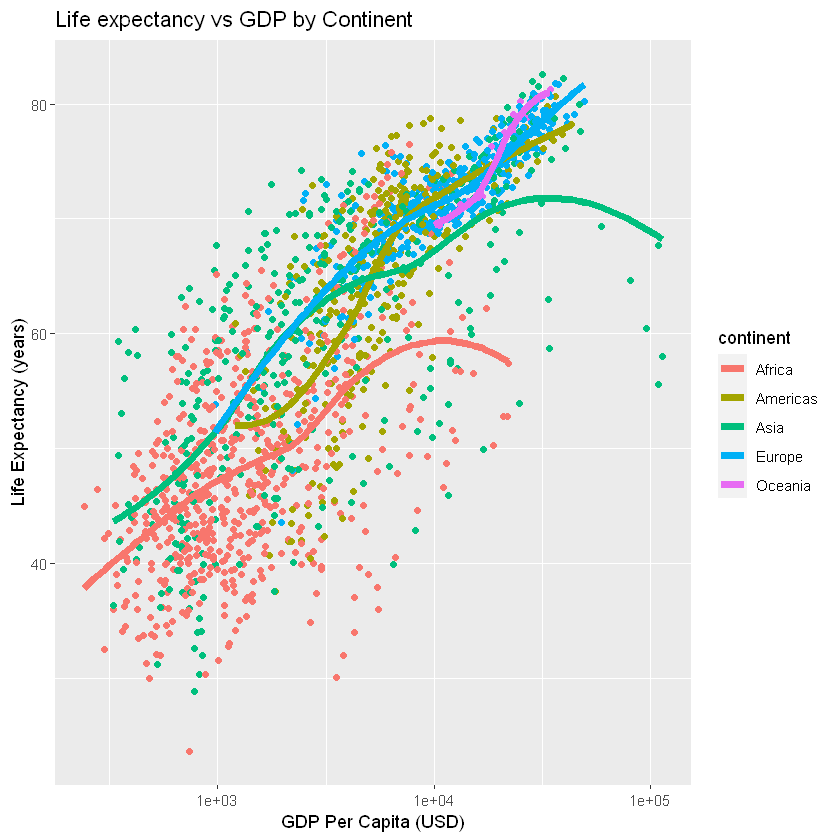

In [59]:

p + theme_gray()

We could also get a black and white background:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



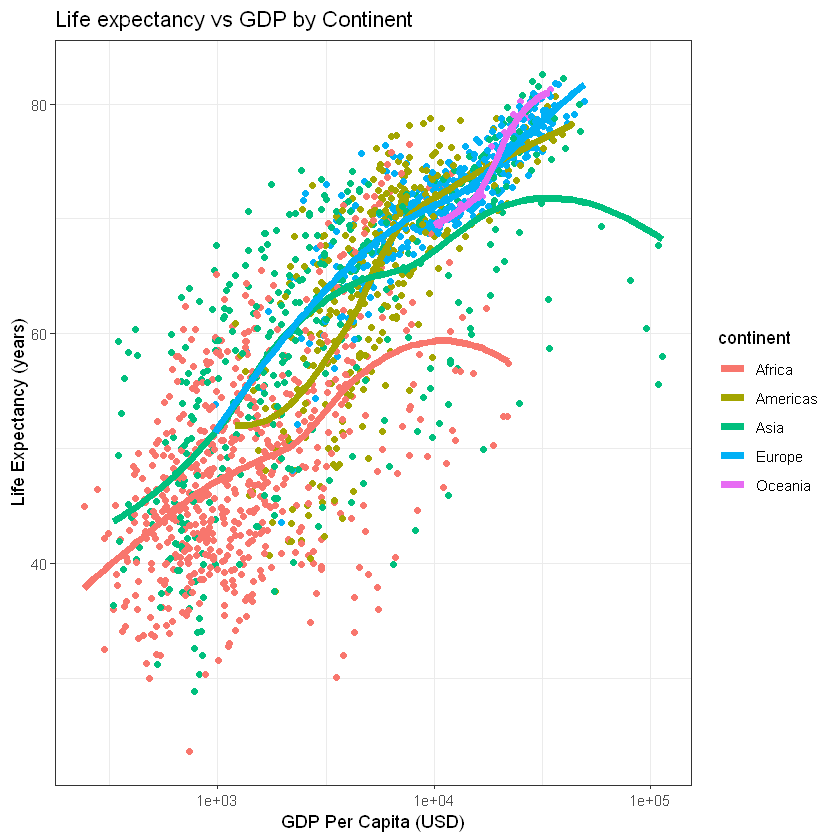

In [60]:
p + theme_bw()

Or go a step further and remove the gridlines:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



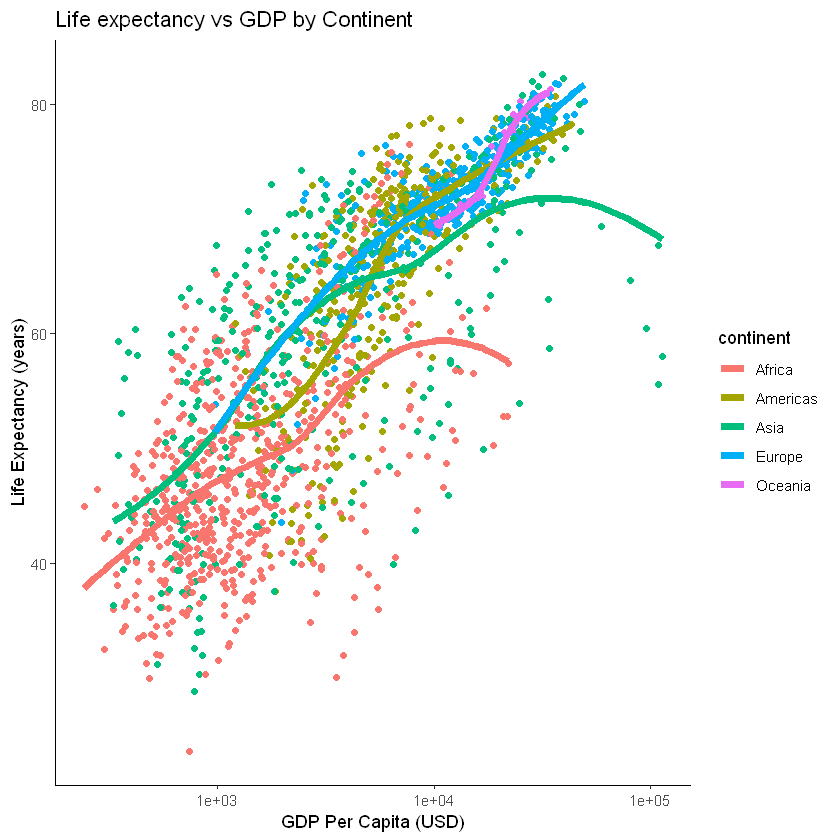

In [61]:
p + theme_classic()

Finally, there's another package that gives us lots of different themes. Install it if you don't have it already. Install all its dependencies along with it.

In [62]:
install.packages("ggthemes", dependencies = TRUE)

Installing package into 'C:/Users/IliasAlexis/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'xopen', 'brew', 'ini', 'remotes', 'DT', 'rcmdcheck', 'roxygen2', 'rversions', 'sessioninfo', 'fontBitstreamVera', 'fontLiberation', 'systemfonts', 'httpuv', 'sourcetools', 'fastmap', 'gh', 'git2r', 'rematch2', 'rex', 'cyclocomp', 'xmlparsedata', 'commonmark', 'hunspell', 'devtools', 'diffobj', 'fontquiver', 'freetypeharfbuzz', 'gdtools', 'shiny', 'usethis', 'covr', 'lintr', 'maps', 'mapproj', 'pander', 'spelling', 'vdiffr'




package 'xopen' successfully unpacked and MD5 sums checked
package 'brew' successfully unpacked and MD5 sums checked
package 'ini' successfully unpacked and MD5 sums checked
package 'remotes' successfully unpacked and MD5 sums checked
package 'DT' successfully unpacked and MD5 sums checked
package 'rcmdcheck' successfully unpacked and MD5 sums checked
package 'roxygen2' successfully unpacked and MD5 sums checked
package 'rversions' successfully unpacked and MD5 sums checked
package 'sessioninfo' successfully unpacked and MD5 sums checked
package 'fontBitstreamVera' successfully unpacked and MD5 sums checked
package 'fontLiberation' successfully unpacked and MD5 sums checked
package 'systemfonts' successfully unpacked and MD5 sums checked
package 'httpuv' successfully unpacked and MD5 sums checked
package 'sourcetools' successfully unpacked and MD5 sums checked
package 'fastmap' successfully unpacked and MD5 sums checked
package 'gh' successfully unpacked and MD5 sums checked
package 'g

Warning message:
"package 'ggthemes' was built under R version 4.0.3"
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



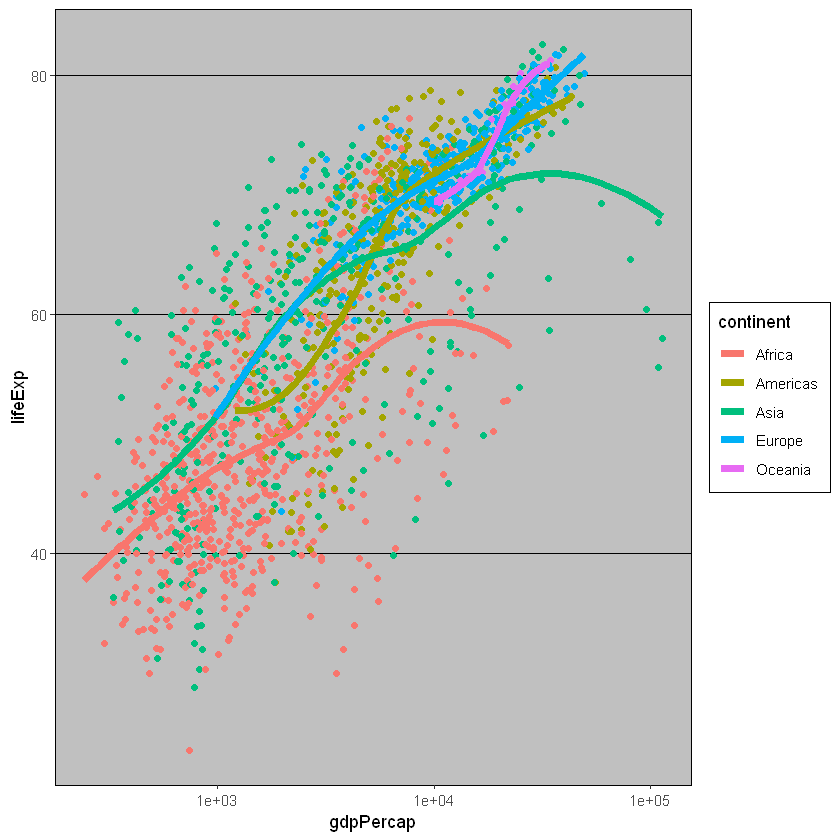

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



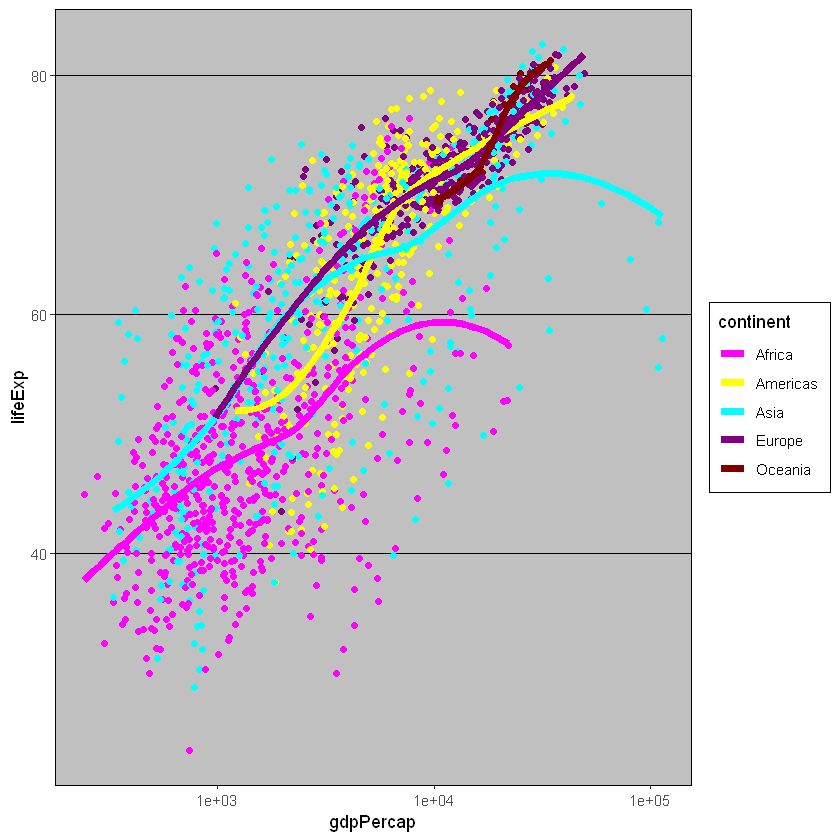

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



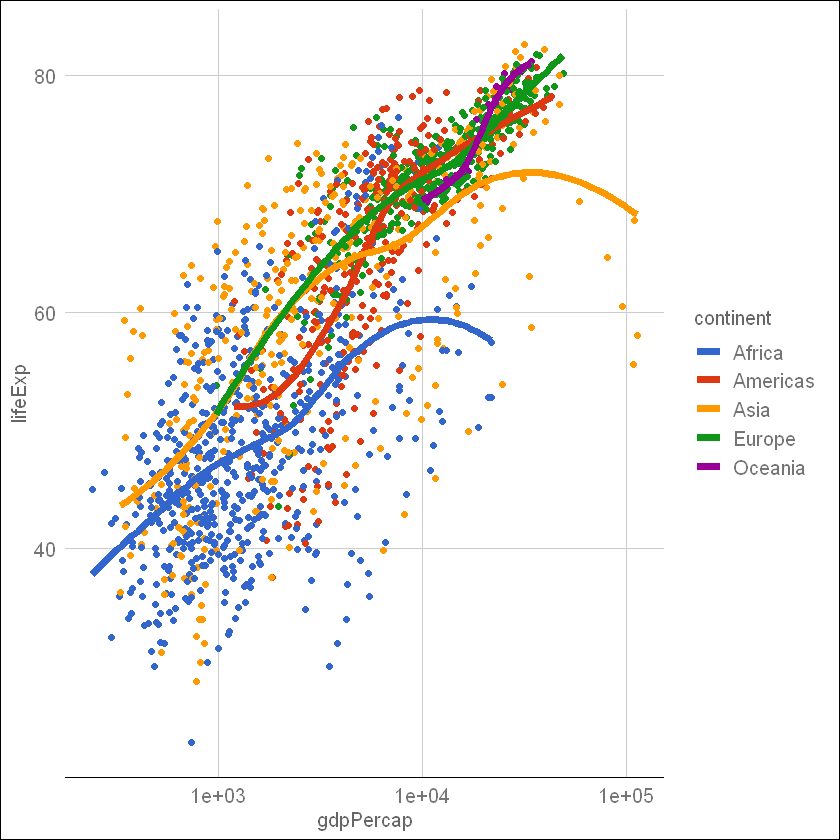

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



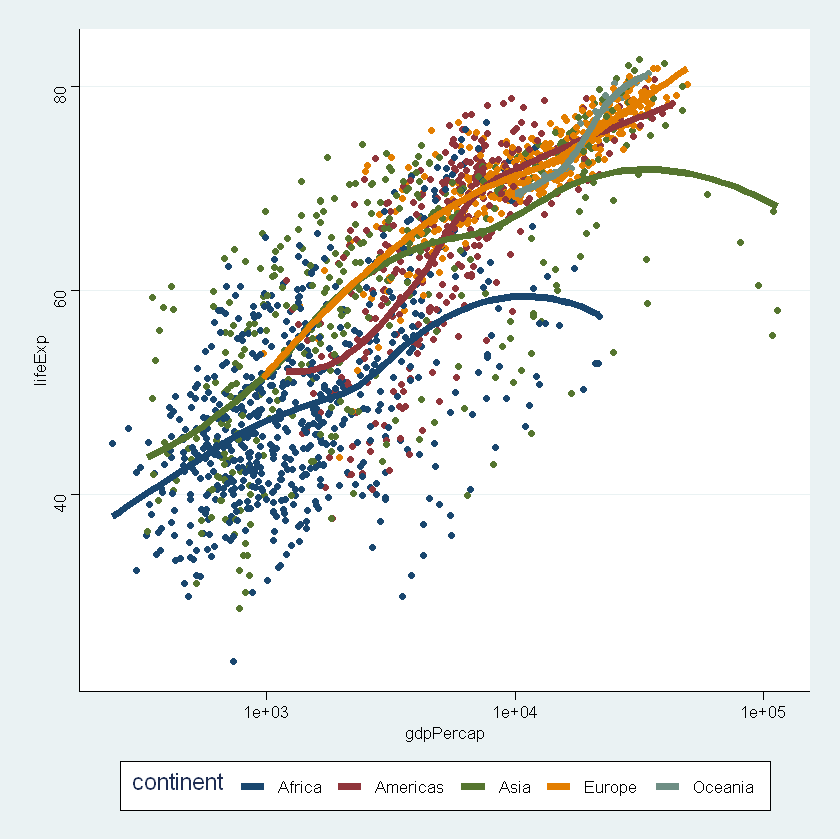

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



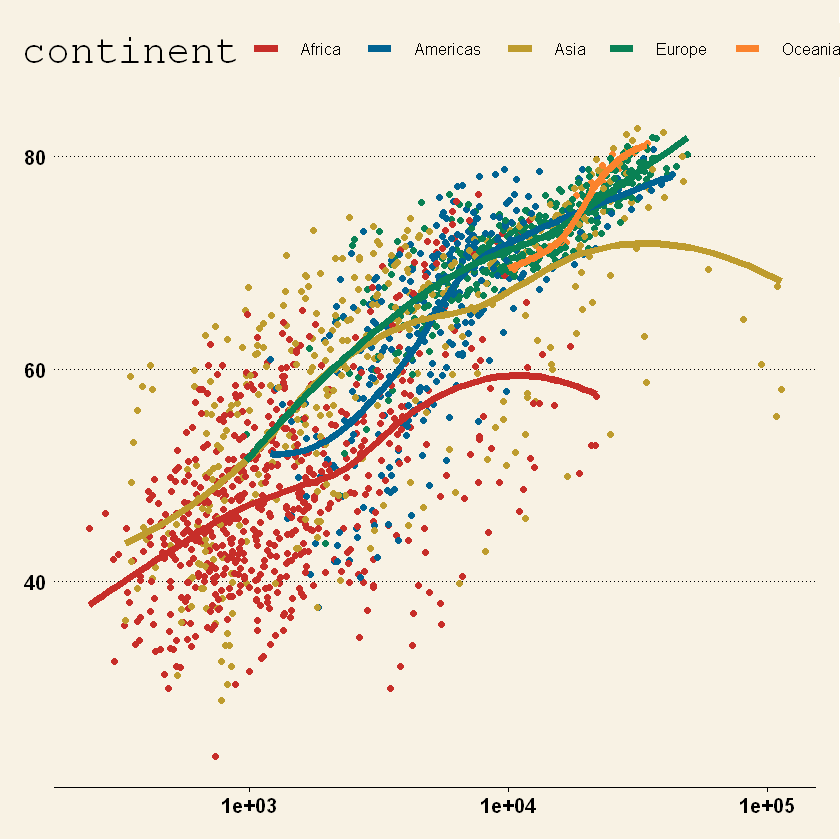

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



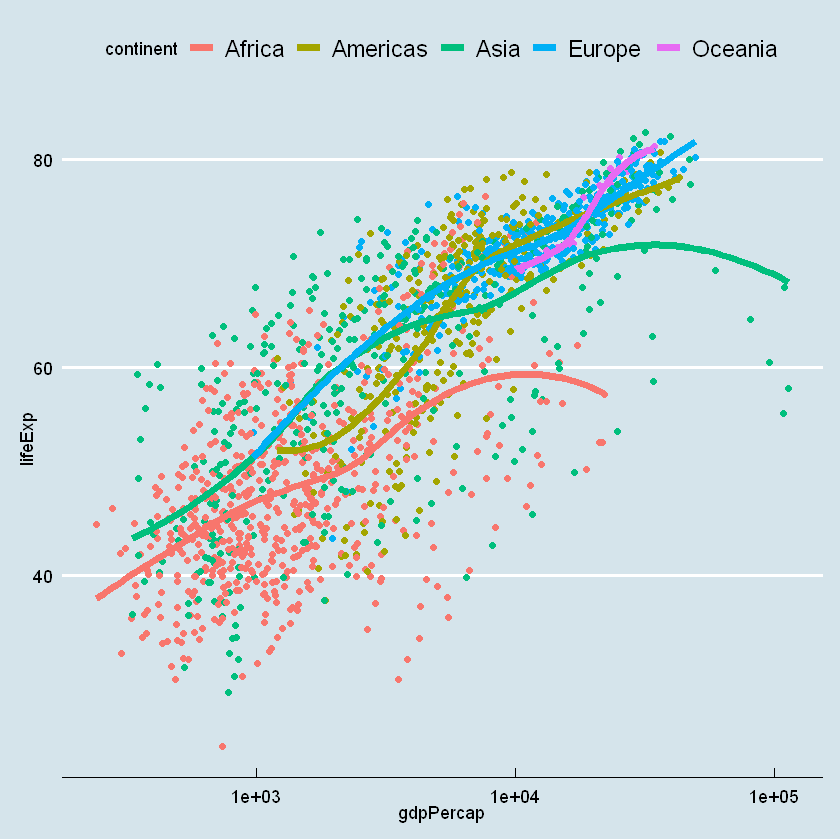

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



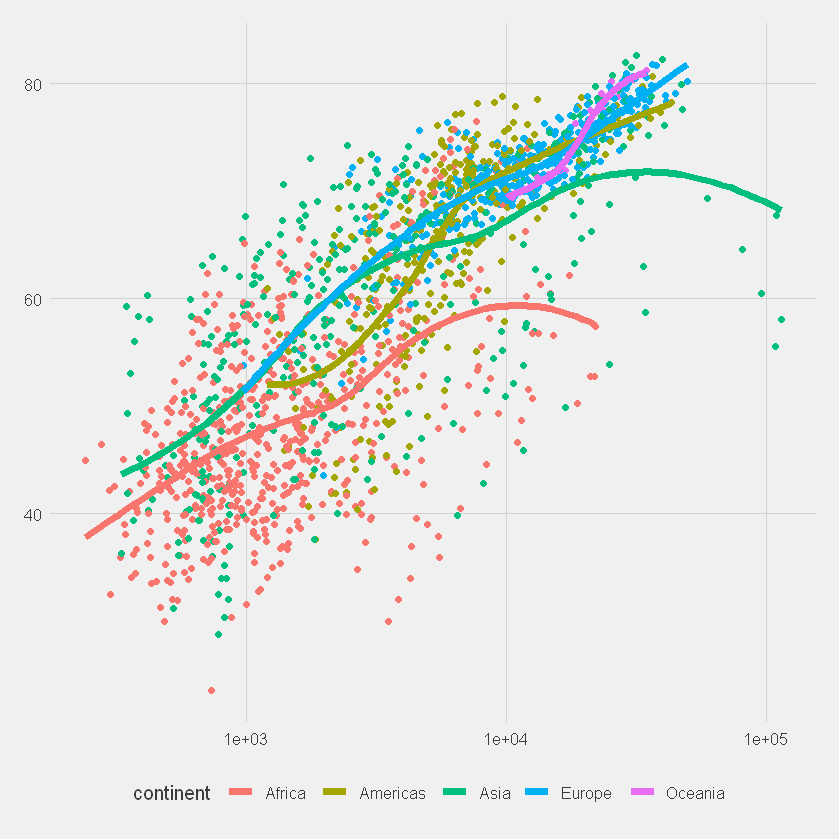

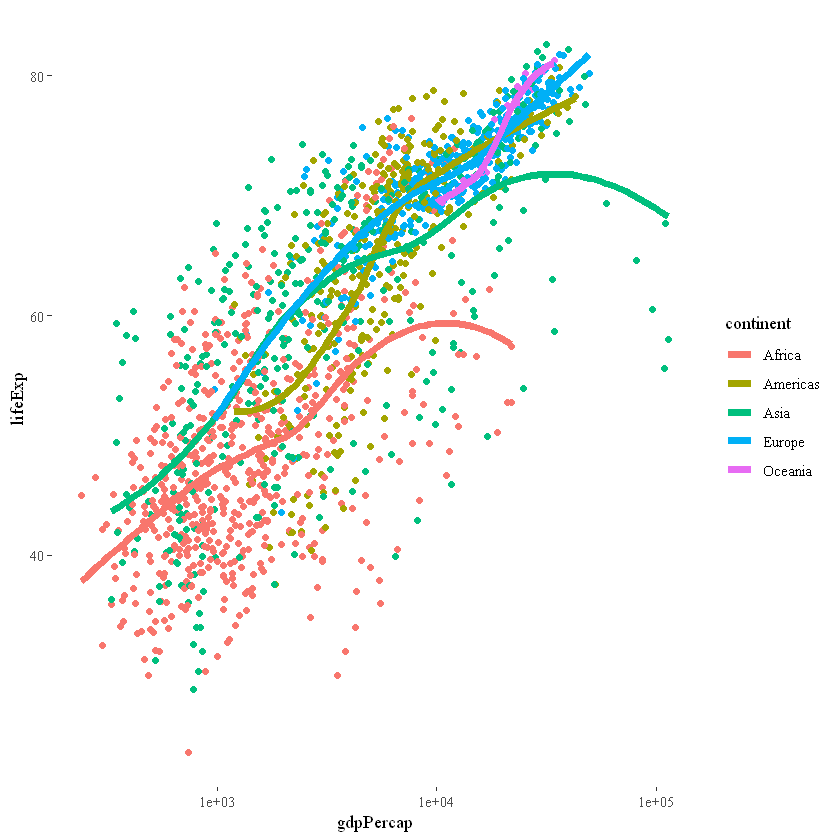

In [63]:
library(ggthemes)
p <- ggplot(gm, aes(gdpPercap, lifeExp)) 
p <- p + scale_x_log10()
p <- p + aes(col=continent) + geom_point() + geom_smooth(lwd=2, se=FALSE)
p + theme_excel()
p + theme_excel() + scale_colour_excel()
p + theme_gdocs() + scale_colour_gdocs()
p + theme_stata() + scale_colour_stata()
p + theme_wsj() + scale_colour_wsj()
p + theme_economist() 
p + theme_fivethirtyeight()
p + theme_tufte()